#APM (Applied Predictive Modeling)

An integrated package for supervised learning, using over 50 kinds of
models, and a variety of different metrics:

      Applied Predictive Modeling
      M. Kuhn and K. Johnson
      Springer-Verlag, 2013.
      ISBN: 978-1-4614-6848-6 (Print)

http://link.springer.com/book/10.1007%2F978-1-4614-6849-3

[APM] is similar to [ISL] and [ESL] but emphasizes practical model
development/evaluation, including case histories with R scripts.

Its <tt>caret</tt> library (http://caret.r-forge.r-project.org) is integrated with R packages that support Supervised Learning using
mainstream model evaluation methods and  100 popular models.

caret package manual (PDF):  http://cran.r-project.org/web/packages/caret/caret.pdf

List of models in caret (reproduced as a table below):
http://caret.r-forge.r-project.org/modelList.html 

caret package overview: http://www.jstatsoft.org/v28/i05/paper

In [31]:

%load_ext rpy2.ipython


In [32]:
%%R

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

In [33]:
%%R

if (not.installed("caret")) install.packages("caret")

library(caret)

library(help=caret)

Documentation for package 'caret'
		Information on package 'caret'

Description:

Package:            caret
Version:            6.0-41
Date:               2015-01-02
Title:              Classification and Regression Training
Author:             Max Kuhn. Contributions from Jed Wing, Steve
                    Weston, Andre Williams, Chris Keefer, Allan
                    Engelhardt, Tony Cooper, Zachary Mayer, Brenton
                    Kenkel, the R Core Team, Michael Benesty, Reynald
                    Lescarbeau, Andrew Ziem, and Luca Scrucca.
Description:        Misc functions for training and plotting
                    classification and regression models
Maintainer:         Max Kuhn <Max.Kuhn@pfizer.com>
Depends:            R (>= 2.10), stats, lattice (>= 0.20), ggplot2
URL:                http://caret.r-forge.r-project.org/
Imports:            car, reshape2, foreach, methods, plyr, nlme,
                    BradleyTerry2
Suggests:           e1071, earth (>= 2.2-3), fastICA, 

Loading required package: lattice
Loading required package: ggplot2


[APM] includes examples using the following packages/models:

C5.0, J48, M5, Nelder-Mead, PART, avNNet, cforest, ctree, cubist, earth,
enet, fda, gbm, glm, glmnet, knn, lda, lm, mda, nb, nnet, pam, pcr, pls,
rf, ridge, rpart, sparseLDA, svmPoly, svmRadial, treebag}

Installing and getting R example scripts:

<pre>
        install.packages("AppliedPredictiveModeling")
        library(AppliedPredictiveModeling)

        getPackages(1:19)  # download ALL packages used in chs 1-19, including caret
</pre>

In [34]:
%%R

if (not.installed("AppliedPredictiveModeling")) {
    
    install.packages("AppliedPredictiveModeling")
    library(AppliedPredictiveModeling)
    
    for (chapter in c(2,3,4,6,7,8,10, 11,12,13,14,16,17,19))  getPackages(chapter)

} else {

    library(AppliedPredictiveModeling)

}

library(help=AppliedPredictiveModeling)   


Documentation for package 'AppliedPredictiveModeling'
		Information on package 'AppliedPredictiveModeling'

Description:

Package:            AppliedPredictiveModeling
Type:               Package
Title:              Functions and Data Sets for 'Applied Predictive
                    Modeling'
Version:            1.1-6
Date:               2014-07-24
Author:             Max Kuhn, Kjell Johnson
Maintainer:         Max Kuhn <mxkuhn@gmail.com>
Description:        A few functions and several data set for the
                    Springer book 'Applied Predictive Modeling'
URL:                http://appliedpredictivemodeling.com/
Depends:            R (>= 2.10)
Imports:            CORElearn, MASS, plyr, reshape2
Suggests:           caret (>= 6.0-22), lattice, ellipse
License:            GPL
Packaged:           2014-07-25 13:37:54 UTC; kuhna03
NeedsCompilation:   no
Repository:         CRAN
Date/Publication:   2014-07-25 18:42:22
Built:              R 3.1.2; ; 2015-01-10 01:37:59 UTC; unix

Ind

In [35]:
%%R

# Grid Search is often used in APM to search a model's parameter space, and
# some chapters use the "doMC" package to do Multi-Core computation
# (supported only on Linux or MacOS):

if (not.installed("doMC"))  install.packages("doMC")   # multicore computation in R

library(doMC)
library(help=doMC)

Documentation for package 'doMC'
		Information on package 'doMC'

Description:

Package:                            doMC
Type:                               Package
Title:                              Foreach parallel adaptor for the
                                    multicore package
Version:                            1.3.3
Author:                             Revolution Analytics
Maintainer:                         Revolution Analytics
                                    <packages@revolutionanalytics.com>
Description:                        Provides a parallel backend for the
                                    %dopar% function using the
                                    multicore functionality of the
                                    parallel package..
Depends:                            R (>= 2.14.0), foreach(>= 1.2.0),
                                    iterators(>= 1.0.0), parallel
Imports:                            utils
Enhances:                           compiler, RUni

Loading required package: foreach
foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com
Loading required package: iterators
Loading required package: parallel


In [36]:
import pandas as pd
pd.set_option('display.max_rows', 500)

ModelDF = pd.read_table("AppliedPredictiveModelingModelTable.tsv")

print(ModelDF.describe())

# print(ModelDF.columns)
#
# colnames = list(ModelDF)
# print(colnames)
# 
# print(ModelDF.ix[:,0:2])  # print first two columns

ModelDF

                        Model method Argument Value            Type Packages  \
count                     180                   180             180      176   
unique                    159                   180               3       88   
top     Partial Least Squares              logicBag  Classification  kernlab   
freq                        4                     1              72       17   

       Tuning Parameters  
count                180  
unique               115  
top                 None  
freq                  24  


Model method Argument Value  \
0                         Boosted Classification Trees                   ada   
1                                      Bagged AdaBoost                AdaBag   
2                                          AdaBoost.M1           AdaBoost.M1   
3               Adaptive Mixture Discriminant Analysis                 amdai   
4        Adaptive-Network-Based Fuzzy Inference System                 ANFIS   
5                        Model Averaged Neural Network                avNNet   
6                                         Bagged Model                   bag   
7                                          Bagged MARS              bagEarth   
8                        Bagged MARS using gCV Pruning           bagEarthGCV   
9                Bagged Flexible Discriminant Analysis                bagFDA   
10                        Bagged FDA using gCV Pruning             bagFDAGCV   
11                   Bayesian Generalized Linear Model              bayesglm   
12                                 Self-Organizing Map                   bdk   
13                        Binary Discriminant Analysis                 binda   
14                                        Boosted Tree            blackboost   
15     Random Forest with Additional Feature Selection                Boruta   
16                Bayesian Regularized Neural Networks                  brnn   
17                                Boosted Linear Model                 bstLs   
18                            Boosted Smoothing Spline                 bstSm   
19                                        Boosted Tree               bstTree   
20                                                C5.0                  C5.0   
21                                 Cost-Sensitive C5.0              C5.0Cost   
22                                 Single C5.0 Ruleset             C5.0Rules   
23                                    Single C5.0 Tree              C5.0Tree   
24                 Conditional Inference Random Forest               cforest   
25                                               SIMCA                CSimca   
26                          Conditional Inference Tree                 ctree   
27                          Conditional Inference Tree                ctree2   
28                                              Cubist                cubist   
29      Dynamic Evolving Neural-Fuzzy Inference System                DENFIS   
30             Stacked AutoEncoder Deep Neural Network                   dnn   
31             Multivariate Adaptive Regression Spline                 earth   
32                            Extreme Learning Machine                   elm   
33                                          Elasticnet                  enet   
34   Ensemble Partial Least Squares Regression with...              enpls.fs   
35           Ensemble Partial Least Squares Regression                 enpls   
36                 Tree Models from Genetic Algorithms                evtree   
37                      Random Forest by Randomization            extraTrees   
38                      Flexible Discriminant Analysis                   fda   
39   Fuzzy Rules Using Genetic Cooperative-Competit...               FH.GBML   
40             Fuzzy Inference Rules by Descent Method                FIR.DM   
41            Ridge Regression with Variable Selection                  foba   
42                      Fuzzy Rules Using Chi's Method             FRBCS.CHI   
43                      Fuzzy Rules with Weight Factor               FRBCS.W   
44                          Simplified TSK Fuzzy Rules                FS.HGD   
45            Generalized Additive Model using Splines                   gam   
46                  Boosted Generalized Additive Model              gamboost   
47              Generalized Additive Model using LOESS              gamLoess   
48            Generalized Additive Model using Splines             gamSpline   
49                                    Gaussian Pr

Chapters use the following models:
<pre>
02_A_Short_Tour.R           lm, earth
04_Over_Fitting.R           svmRadial, glm
06_Linear_Regression.R      lm, pls, pcr, ridge, enet
07_Non-Linear_Reg.R         avNNet, earth, svmRadial, svmPoly, knn
08_Regression_Trees.R       rpart, ctree, M5, treebag, rf, cforest, gbm
10_Case_Study_Concrete.R    lm, pls, enet, earth, svmRadial, avNNet, rpart,
                            treebag, ctree, rf, gbm, cubist, M5, Nelder-Mead
11_Class_Performance.R      glm
12_Discriminant_Analysis.R  svmRadial, glm, lda, pls, glmnet, pam
13_Non-Linear_Class.R       mda, nnet, avNNet, fda, svmRadial, svmPoly, knn, nb
14_Class_Trees.R            rpart, J48, PART, treebag, rf, gbm, C5.0
16_Class_Imbalance.R        rf, glm, fda, svmRadial, rpart, C5.0
17_Job_Scheduling.R         rpart, lda, sparseLDA, nnet, pls, fda, rf, C5.0,
                            treebag, svmRadial
19_Feature_Select.R         rf, lda, svmRadial, nb, glm, knn, svmRadial, knn
</pre>

Training control methods used by the scripts:
<pre>
04_Over_Fitting.R           repeatedcv, cv, LOOCV, LGOCV, boot, boot632
06_Linear_Regression.R      cv
07_Non-Linear_Reg.R         cv
08_Regression_Trees.R       cv, oob
10_Case_Study_Concrete.R    repeatedcv
11_Class_Performance.R      repeatedcv
12_Discriminant_Analysis.R  cv, LGOCV
13_Non-Linear_Class.R       LGOCV
14_Class_Trees.R            LGOCV
16_Class_Imbalance.R        cv
17_Job_Scheduling.R         repeatedcv
19_Feature_Select.R         repeatedcv, cv
</pre>


#Print the script from any [APM] Chapter

In [37]:
%%R

APMchapters = c(
"",
"02_A_Short_Tour.R",
"03_Data_Pre_Processing.R",
"04_Over_Fitting.R",
"",
"06_Linear_Regression.R",
"07_Non-Linear_Reg.R",
"08_Regression_Trees.R",
"",
"10_Case_Study_Concrete.R",
"11_Class_Performance.R",
"12_Discriminant_Analysis.R",
"13_Non-Linear_Class.R",
"14_Class_Trees.R",
"",
"16_Class_Imbalance.R",
"17_Job_Scheduling.R",
"18_Importance.R",
"19_Feature_Select.R",
"CreateGrantData.R")

showChapterScript = function(n) {
  if (APMchapters[n] != "")
    file.show( file.path( scriptLocation(), APMchapters[n] ))
}

showChapterOutput = function(n) {
  if (APMchapters[n] != "")
    file.show( file.path( scriptLocation(), paste(APMchapters[n],"out",sep="") ))
}

runChapterScript = function(n) {
  if (APMchapters[n] != "")
    source( file.path( scriptLocation(), APMchapters[n] ),  echo=TRUE )
}

In [41]:
%%R

showChapterScript(2)

NULL


In [42]:
%%R

# showChapterOutput(2)

NULL


In [43]:
%%R -w 600 -h 600

runChapterScript(2)

##     user  system elapsed 
##    4.971   0.114   5.292 


NULL


 [1] "02_A_Short_Tour.R"             "02_A_Short_Tour.Rout"         
 [3] "03_Data_Pre_Processing.R"      "03_Data_Pre_Processing.Rout"  
 [5] "04_Over_Fitting.R"             "04_Over_Fitting.Rout"         
 [7] "06_Linear_Regression.R"        "06_Linear_Regression.Rout"    
 [9] "07_Non-Linear_Reg.R"           "07_Non-Linear_Reg.Rout"       
[11] "08_Regression_Trees.R"         "08_Regression_Trees.Rout"     
[13] "10_Case_Study_Concrete.R"      "10_Case_Study_Concrete.Rout"  
[15] "11_Class_Performance.R"        "11_Class_Performance.Rout"    
[17] "12_Discriminant_Analysis.R"    "12_Discriminant_Analysis.Rout"
[19] "13_Non-Linear_Class.R"         "13_Non-Linear_Class.Rout"     
[21] "14_Class_Trees.R"              "14_Class_Trees.Rout"          
[23] "16_Class_Imbalance.R"          "16_Class_Imbalance.Rout"      
[25] "17_Job_Scheduling.R"           "17_Job_Scheduling.Rout"       
[27] "18_Importance.R"               "18_Importance.Rout"           
[29] "19_Feature_Select.R"        

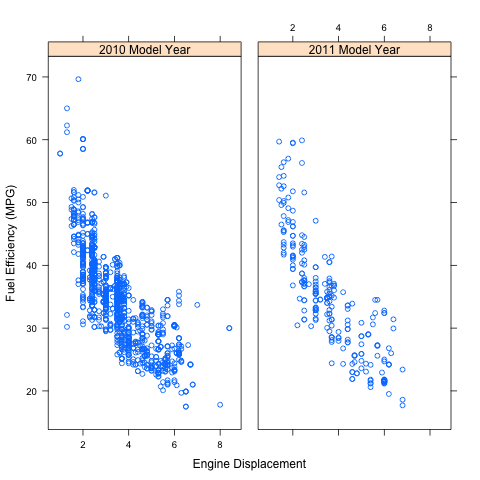

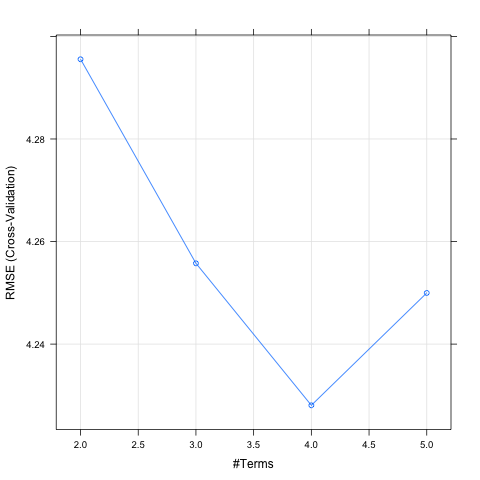

In [39]:
%%R

# Another way to run the script for Chapter 2:

PATIENT = TRUE

if (PATIENT) {
   current_working_directory = getwd()  # remember current directory

   chapter_code_directory = scriptLocation()

   setwd( chapter_code_directory )
   print(dir())

   print(source("02_A_Short_Tour.R", echo=TRUE))

   setwd(current_working_directory)  # return to working directory
}

Linear Regression 

1107 samples
  13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 997, 996, 995, 996, 997, 996, ... 

Resampling results

  RMSE      Rsquared  RMSE SD   Rsquared SD
  4.604285  0.628494  0.492878  0.04418925 

 
Linear Regression 

1107 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 997, 996, 995, 996, 997, 996, ... 

Resampling results

  RMSE      Rsquared   RMSE SD    Rsquared SD
  4.228432  0.6843226  0.4194454  0.04210009 

 


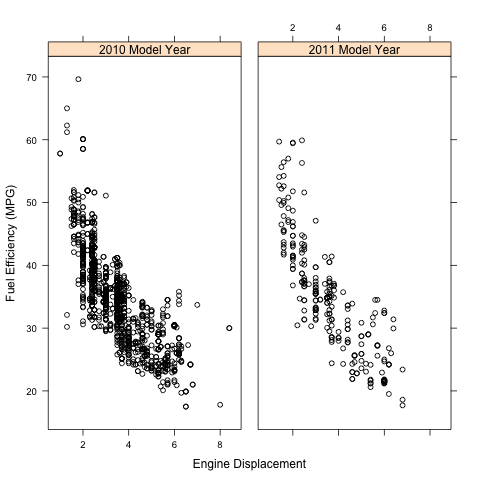

In [137]:
%%R

## Another way to run the Chapter 2 script

library(AppliedPredictiveModeling)
data(FuelEconomy)

## Format data for plotting against engine displacement

## Sort by engine displacement
cars2010 <- cars2010[order(cars2010$EngDispl),]
cars2011 <- cars2011[order(cars2011$EngDispl),]

## Combine data into one data frame
cars2010a <- cars2010
cars2010a$Year <- "2010 Model Year"
cars2011a <- cars2011
cars2011a$Year <- "2011 Model Year"

plotData <- rbind(cars2010a, cars2011a)

library(lattice)

print(
    xyplot(FE ~ EngDispl|Year, plotData,
       xlab = "Engine Displacement",
       ylab = "Fuel Efficiency (MPG)",
       between = list(x = 1.2))
)

##########  'plot' routines in the lattice package must be print'ed to obtain their output !

## Fit a single linear model and conduct 10-fold CV to estimate the error

library(caret)
set.seed(1)
lm1Fit <- train(FE ~ EngDispl,
                data = cars2010,
                method = "lm",
                trControl = trainControl(method= "cv"))
print(lm1Fit)


## Fit a quadratic model too

## Create squared terms
cars2010$ED2 <- cars2010$EngDispl^2
cars2011$ED2 <- cars2011$EngDispl^2

set.seed(1)
lm2Fit <- train(FE ~ EngDispl + ED2,
                data = cars2010,
                method = "lm",
                trControl = trainControl(method= "cv"))
print(lm2Fit)

Multivariate Adaptive Regression Spline 

1107 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 997, 996, 995, 996, 997, 996, ... 

Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   RMSE SD    Rsquared SD
  2       4.295551  0.6734579  0.4412493  0.04289014 
  3       4.255755  0.6802699  0.4403794  0.03947172 
  4       4.228066  0.6845448  0.4488977  0.04278739 
  5       4.249977  0.6820430  0.4886947  0.04318735 

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were nprune = 4 and degree = 1. 


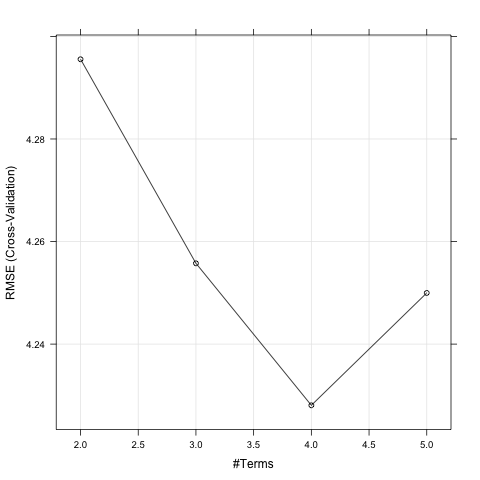

In [134]:
%%R

## Finally a MARS model (via the earth package)

library(earth)
set.seed(1)
marsFit <- train(FE ~ EngDispl,
                 data = cars2010,
                 method = "earth",
                 tuneLength = 15,
                 trControl = trainControl(method= "cv"))
print(marsFit)


plot(marsFit)

In [132]:
%%R

## Predict the test set data
cars2011$lm1  <- predict(lm1Fit,  cars2011)
cars2011$lm2  <- predict(lm2Fit,  cars2011)
cars2011$mars <- predict(marsFit, cars2011)

## Get test set performance values via caret's postResample function

print(postResample(pred = cars2011$lm1,  obs = cars2011$FE))
print(postResample(pred = cars2011$lm2,  obs = cars2011$FE))
print(postResample(pred = cars2011$mars, obs = cars2011$FE))

     RMSE  Rsquared 
5.1625309 0.7018642 
     RMSE  Rsquared 
4.7162853 0.7486074 
     RMSE  Rsquared 
4.6855501 0.7499953 


In [45]:
%%R

showChapterScript(3)

NULL


In [46]:
%%R

showChapterOutput(3)

NULL


In [123]:
%%R -w 600 -h 600

runChapterScript(3)

##    user  system elapsed 
##   5.791   0.147   6.146 


NULL


In [50]:
%%R

### Section 3.1 Case Study: Cell Segmentation in High-Content Screening

library(AppliedPredictiveModeling)
data(segmentationOriginal)

## Retain the original training set
segTrain <- subset(segmentationOriginal, Case == "Train")

## Remove the first three columns (identifier columns)
segTrainX <- segTrain[, -(1:3)]
segTrainClass <- segTrain$Class

print(colnames(segTrain))

print(table(segTrainClass))

  [1] "Cell"                          "Case"                         
  [3] "Class"                         "AngleCh1"                     
  [5] "AngleStatusCh1"                "AreaCh1"                      
  [7] "AreaStatusCh1"                 "AvgIntenCh1"                  
  [9] "AvgIntenCh2"                   "AvgIntenCh3"                  
 [11] "AvgIntenCh4"                   "AvgIntenStatusCh1"            
 [13] "AvgIntenStatusCh2"             "AvgIntenStatusCh3"            
 [15] "AvgIntenStatusCh4"             "ConvexHullAreaRatioCh1"       
 [17] "ConvexHullAreaRatioStatusCh1"  "ConvexHullPerimRatioCh1"      
 [19] "ConvexHullPerimRatioStatusCh1" "DiffIntenDensityCh1"          
 [21] "DiffIntenDensityCh3"           "DiffIntenDensityCh4"          
 [23] "DiffIntenDensityStatusCh1"     "DiffIntenDensityStatusCh3"    
 [25] "DiffIntenDensityStatusCh4"     "EntropyIntenCh1"              
 [27] "EntropyIntenCh3"               "EntropyIntenCh4"              
 [29] "EntropyIntenS

Box-Cox Transformation

1009 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.74   64.37   79.02   91.61  103.20  459.80 

Largest/Smallest: 9.63 
Sample Skewness: 2.59 

Estimated Lambda: -1.1 



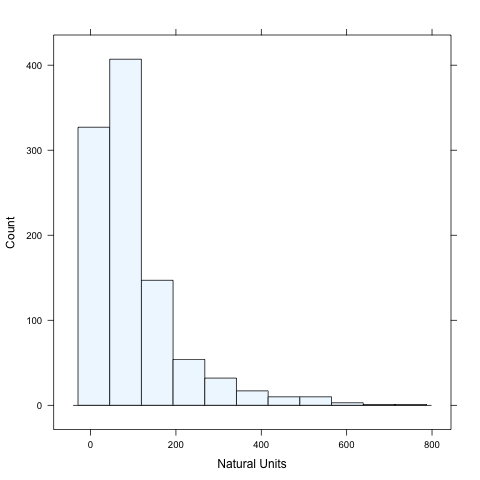

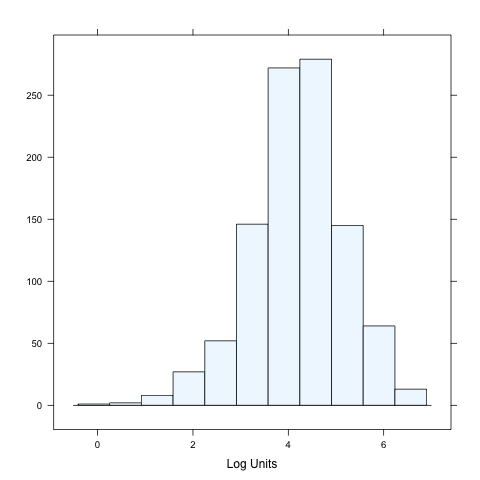

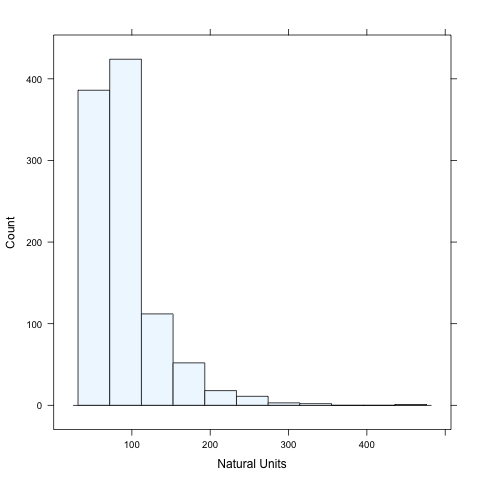

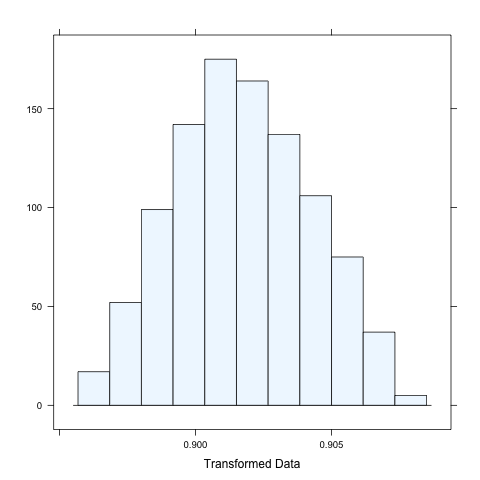

In [58]:
%%R

### Section 3.2 Data Transformations for Individual Predictors

## The column VarIntenCh3 measures the standard deviation of the intensity
## of the pixels in the actin filaments

max(segTrainX$VarIntenCh3)/min(segTrainX$VarIntenCh3)

library(e1071)
skewness(segTrainX$VarIntenCh3)

library(caret)

## Use caret's preProcess function to transform for skewness
segPP <- preProcess(segTrainX, method = "BoxCox")

## Apply the transformations
segTrainTrans <- predict(segPP, segTrainX)

## Results for a single predictor
segPP$bc$VarIntenCh3

print(
histogram(~segTrainX$VarIntenCh3,
          xlab = "Natural Units",
          type = "count")
)
print(
histogram(~log(segTrainX$VarIntenCh3),
          xlab = "Log Units",
          ylab = " ",
          type = "count")
)
print(
segPP$bc$PerimCh1
)
print(
histogram(~segTrainX$PerimCh1,
          xlab = "Natural Units",
          type = "count")
)
print(
histogram(~segTrainTrans$PerimCh1,
          xlab = "Transformed Data",
          ylab = " ",
          type = "count")
)

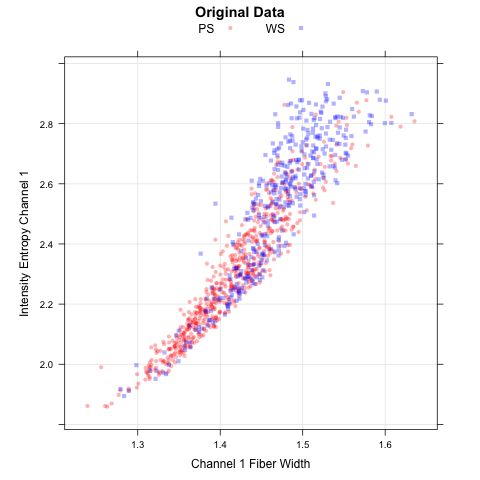

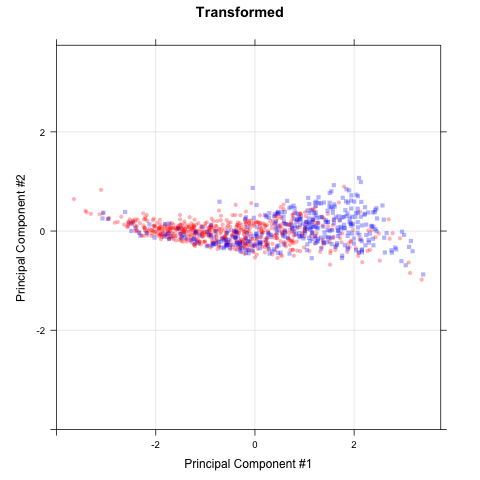

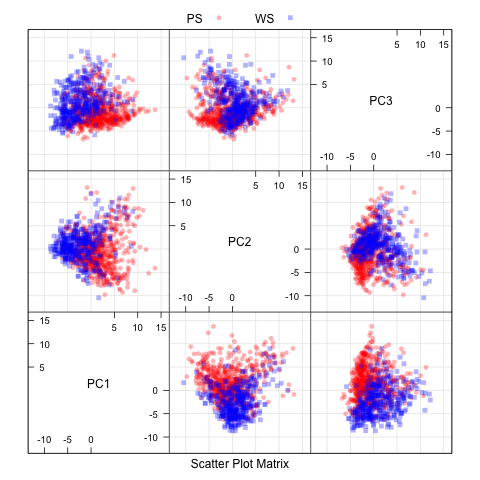

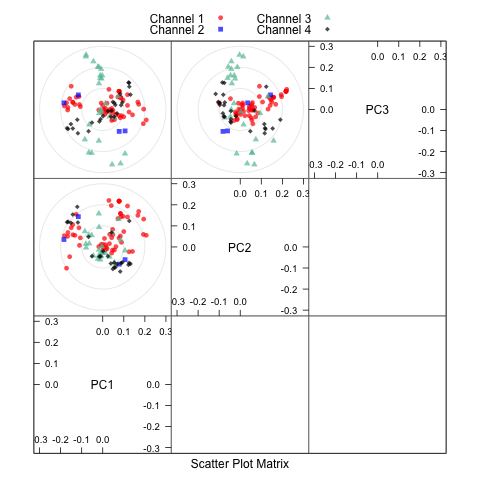

In [52]:
%%R

### Section 3.3 Data Transformations for Multiple Predictors

## R's prcomp is used to conduct PCA
pr <- prcomp(~ AvgIntenCh1 + EntropyIntenCh1,
             data = segTrainTrans,
             scale. = TRUE)


transparentTheme(pchSize = .7, trans = .3)

print(
    xyplot(AvgIntenCh1 ~ EntropyIntenCh1,
       data = segTrainTrans,
       groups = segTrain$Class,
       xlab = "Channel 1 Fiber Width",
       ylab = "Intensity Entropy Channel 1",
       auto.key = list(columns = 2),
       type = c("p", "g"),
       main = "Original Data",
       aspect = 1)
)
print(
xyplot(PC2 ~ PC1,
       data = as.data.frame(pr$x),
       groups = segTrain$Class,
       xlab = "Principal Component #1",
       ylab = "Principal Component #2",
       main = "Transformed",
       xlim = extendrange(pr$x),
       ylim = extendrange(pr$x),
       type = c("p", "g"),
       aspect = 1)
)

## Apply PCA to the entire set of predictors.

## There are a few predictors with only a single value, so we remove these first
## (since PCA uses variances, which would be zero)

isZV <- apply(segTrainX, 2, function(x) length(unique(x)) == 1)
segTrainX <- segTrainX[, !isZV]

segPP <- preProcess(segTrainX, c("BoxCox", "center", "scale"))
segTrainTrans <- predict(segPP, segTrainX)

segPCA <- prcomp(segTrainTrans, center = TRUE, scale. = TRUE)

## Plot a scatterplot matrix of the first three components
transparentTheme(pchSize = .8, trans = .3)

panelRange <- extendrange(segPCA$x[, 1:3])
print(
 splom(as.data.frame(segPCA$x[, 1:3]),
      groups = segTrainClass,
      type = c("p", "g"),
      as.table = TRUE,
      auto.key = list(columns = 2),
      prepanel.limits = function(x) panelRange)
)
## Format the rotation values for plotting
segRot <- as.data.frame(segPCA$rotation[, 1:3])

## Derive the channel variable
vars <- rownames(segPCA$rotation)
channel <- rep(NA, length(vars))
channel[grepl("Ch1$", vars)] <- "Channel 1"
channel[grepl("Ch2$", vars)] <- "Channel 2"
channel[grepl("Ch3$", vars)] <- "Channel 3"
channel[grepl("Ch4$", vars)] <- "Channel 4"

segRot$Channel <- channel
segRot <- segRot[complete.cases(segRot),]

segRot$Channel <- factor(as.character(segRot$Channel))

## Plot a scatterplot matrix of the first three rotation variables

transparentTheme(pchSize = .8, trans = .7)
panelRange <- extendrange(segRot[, 1:3])
library(ellipse)
upperp <- function(...)
  {
    args <- list(...)
    circ1 <- ellipse(diag(rep(1, 2)), t = .1)
    panel.xyplot(circ1[,1], circ1[,2],
                 type = "l",
                 lty = trellis.par.get("reference.line")$lty,
                 col = trellis.par.get("reference.line")$col,
                 lwd = trellis.par.get("reference.line")$lwd)
    circ2 <- ellipse(diag(rep(1, 2)), t = .2)
    panel.xyplot(circ2[,1], circ2[,2],
                 type = "l",
                 lty = trellis.par.get("reference.line")$lty,
                 col = trellis.par.get("reference.line")$col,
                 lwd = trellis.par.get("reference.line")$lwd)
    circ3 <- ellipse(diag(rep(1, 2)), t = .3)
    panel.xyplot(circ3[,1], circ3[,2],
                 type = "l",
                 lty = trellis.par.get("reference.line")$lty,
                 col = trellis.par.get("reference.line")$col,
                 lwd = trellis.par.get("reference.line")$lwd)
    panel.xyplot(args$x, args$y, groups = args$groups, subscripts = args$subscripts)
  }
          
print(
splom(~segRot[, 1:3],
      groups = segRot$Channel,
      lower.panel = function(...){}, upper.panel = upperp,
      prepanel.limits = function(x) panelRange,
      auto.key = list(columns = 2))
)

 [1]  85  45 100  13  79   8  19  25  97  71  35  99   5   6  29  39  37   3  17
[20] 105  57  61  49  58   7  62  50  18  89  31   9 102   4  38  34  52  51 108
[39]  40  88  87  22  73


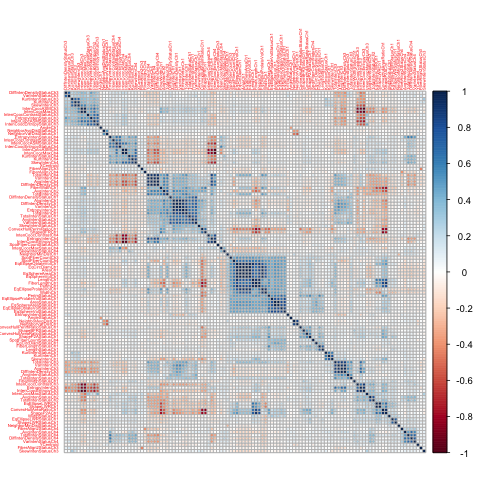

In [54]:
%%R

### Section 3.5 Removing Variables

## To filter on correlations, we first get the correlation matrix for the
## predictor set

segCorr <- cor(segTrainTrans)

library(corrplot)
corrplot(segCorr, order = "hclust", tl.cex = .35)

## caret's findCorrelation function is used to identify columns to remove.
highCorr <- findCorrelation(segCorr, .75)

print(highCorr)

In [57]:
%%R

### Section 3.8 Computing (Creating Dummy Variables)

data(cars)
type <- c("convertible", "coupe", "hatchback", "sedan", "wagon")
cars$Type <- factor(apply(cars[, 14:18], 1, function(x) type[which(x == 1)]))

carSubset <- cars[sample(1:nrow(cars), 20), c(1, 2, 19)]

print(
    head(carSubset)
)
print(
    levels(carSubset$Type)
)

       Price Mileage        Type
759 13540.04   17343       sedan
303 18912.98   21512       sedan
765 15623.92   21272       sedan
219 33540.54   20925 convertible
550 22064.29   27384       sedan
110 11903.10   25285       coupe
[1] "convertible" "coupe"       "hatchback"   "sedan"       "wagon"      


In [56]:
%%R

simpleMod <- dummyVars(~Mileage + Type,
                       data = carSubset,
                       ## Remove the variable name from the
                       ## column name
                       levelsOnly = TRUE)
print(
    simpleMod
)

withInteraction <- dummyVars(~Mileage + Type + Mileage:Type,
                             data = carSubset,
                             levelsOnly = TRUE)
print(
    withInteraction
)
print(
    predict(withInteraction, head(carSubset))
)

Dummy Variable Object

Formula: ~Mileage + Type
2 variables, 1 factors
Factor variable names will be removed
A less than full rank encoding is used
Dummy Variable Object

Formula: ~Mileage + Type + Mileage:Type
2 variables, 1 factors
Factor variable names will be removed
A less than full rank encoding is used
    Mileage convertible coupe hatchback sedan wagon Mileage:convertible
635    9049           0     0         0     1     0                   0
421   17870           0     0         0     1     0                   0
257   26700           0     1         0     0     0                   0
221   10340           1     0         0     0     0               10340
642   25557           0     0         0     1     0                   0
84    13776           0     1         0     0     0                   0
    Mileage:coupe Mileage:hatchback Mileage:sedan Mileage:wagon
635             0                 0          9049             0
421             0                 0         17870        

In [59]:
%%R

showChapterScript(4)

NULL


In [124]:
%%R

showChapterOutput(4)

NULL



> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Jo .... [TRUNCATED] 

> data(GermanCredit)

> ## First, remove near-zero variance predictors then get rid of a few predictors 
> ## that duplicate values. For example, there are two possible val .... [TRUNCATED] 

> GermanCredit$CheckingAccountStatus.lt.0 <- NULL

> GermanCredit$SavingsAccountBonds.lt.100 <- NULL

> GermanCredit$EmploymentDuration.lt.1 <- NULL

> GermanCredit$EmploymentDuration.Unemployed <- NULL

> GermanCredit$Personal.Male.Married.Widowed <- NULL

> GermanCredit$Property.Unknown <- NULL

> GermanCredit$Housing.ForFree <- NULL

> ## Split the data into training (80%) and test sets (20%)
> set.seed(100)

> inTrain <- createDataPartition(GermanCredit$Class, p = .8)[[1]]

> GermanCreditTrain <- GermanCredit[ inTrain, ]

> GermanCreditTest  <- GermanCredit[-inTrain, ]

> ## The model fitting code shown in the computing secti

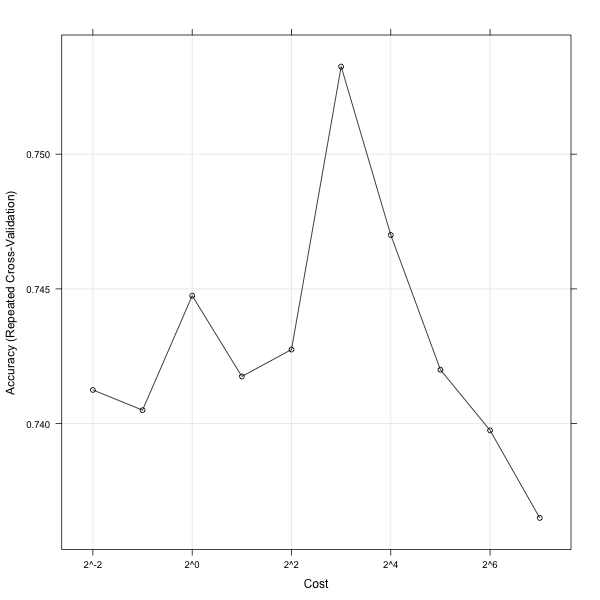

In [46]:
%%R -w 600 -h 600

runChapterScript(4)

In [52]:
%%R

minutes_required_for_previous_script = 3260.432 / 60
print(minutes_required_for_previous_script)

## user   system  elapsed 
## 3260.432  211.968  906.933 

[1] 54.34053



Attaching package: 'caret'

The following object is masked from 'package:pls':

    R2

Support Vector Machines with Radial Basis Function Kernel 

800 samples
 41 predictor
  2 classes: 'Bad', 'Good' 

Pre-processing: centered, scaled 
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 

Resampling results across tuning parameters:

  C       Accuracy  Kappa      Accuracy SD  Kappa SD 
    0.25  0.74125   0.3515540  0.05046025   0.1175042
    0.50  0.74050   0.3462643  0.05178941   0.1205921
    1.00  0.74475   0.3441089  0.05070234   0.1194702
    2.00  0.74175   0.3209028  0.04681229   0.1193335
    4.00  0.74275   0.3160328  0.04890967   0.1220800
    8.00  0.75325   0.3389174  0.04836682   0.1291946
   16.00  0.74700   0.3081410  0.04428859   0.1252361
   32.00  0.74200   0.2922277  0.04466142   0.1274896
   64.00  0.73975   0.2727270  0.04451338   0.1371257
  128.00  0.73650   0.2763129  0.04495179   0.1278093

Tu

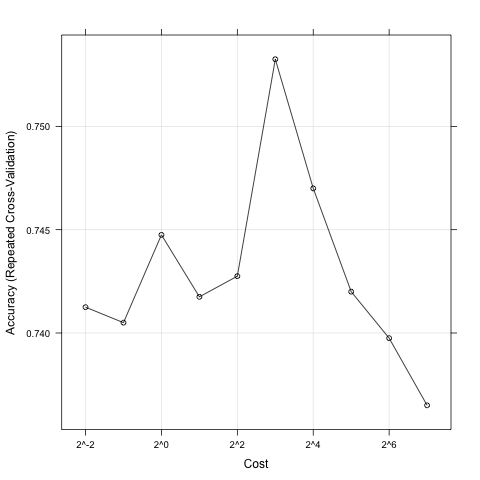

In [125]:
%%R

######## This computation can take five minutes to complete on a single cpu.

### Section 4.6 Choosing Final Tuning Parameters

detach(package:caret)  # reload the package, since the code here modifies GermanCredit
library(caret)
data(GermanCredit)

## First, remove near-zero variance predictors then get rid of a few predictors
## that duplicate values. For example, there are two possible values for the
## housing variable: "Rent", "Own" and "ForFree". So that we don't have linear
## dependencies, we get rid of one of the levels (e.g. "ForFree")

GermanCredit <- GermanCredit[, -nearZeroVar(GermanCredit)]
GermanCredit$CheckingAccountStatus.lt.0 <- NULL
GermanCredit$SavingsAccountBonds.lt.100 <- NULL
GermanCredit$EmploymentDuration.lt.1 <- NULL
GermanCredit$EmploymentDuration.Unemployed <- NULL
GermanCredit$Personal.Male.Married.Widowed <- NULL
GermanCredit$Property.Unknown <- NULL
GermanCredit$Housing.ForFree <- NULL

## Split the data into training (80%) and test sets (20%)
set.seed(100)
inTrain <- createDataPartition(GermanCredit$Class, p = .8)[[1]]
GermanCreditTrain <- GermanCredit[ inTrain, ]
GermanCreditTest  <- GermanCredit[-inTrain, ]

## The model fitting code shown in the computing section is fairly
## simplistic.  For the text we estimate the tuning parameter grid
## up-front and pass it in explicitly. This generally is not needed,
## but was used here so that we could trim the cost values to a
## presentable range and to re-use later with different resampling
## methods.

library(kernlab)
set.seed(231)
sigDist <- sigest(Class ~ ., data = GermanCreditTrain, frac = 1)
svmTuneGrid <- data.frame(sigma = as.vector(sigDist)[1], C = 2^(-2:7))

### Optional: parallel processing can be used via the 'do' packages,
### such as doMC, doMPI etc. We used doMC (not on Windows) to speed
### up the computations.

### WARNING: Be aware of how much memory is needed to parallel
### process. It can very quickly overwhelm the available hardware. We
### estimate the memory usage (VSIZE = total memory size) to be
### 2566M/core.

### library(doMC)
### registerDoMC(4)

set.seed(1056)
svmFit <- train(Class ~ .,
                data = GermanCreditTrain,
                method = "svmRadial",
                preProc = c("center", "scale"),
                tuneGrid = svmTuneGrid,
                trControl = trainControl(method = "repeatedcv",
                                         repeats = 5,
                                         classProbs = TRUE))
## classProbs = TRUE was added since the text was written

## Print the results
print(
    svmFit
)

## A line plot of the average performance. The 'scales' argument is actually an
## argument to xyplot that converts the x-axis to log-2 units.

print(
plot(svmFit, scales = list(x = list(log = 2)))
)

## Test set predictions

predictedClasses <- predict(svmFit, GermanCreditTest)
print(
    str(predictedClasses)
)

## Use the "type" option to get class probabilities

predictedProbs <- predict(svmFit, newdata = GermanCreditTest, type = "prob")
print(
    head(predictedProbs)
)

In [122]:
%%R

######## This computation can take over a half hour to complete on a single cpu.

## Fit the same model using different resampling methods. The main syntax change
## is the control object.

set.seed(1056)
svmFit10CV <- train(Class ~ .,
                    data = GermanCreditTrain,
                    method = "svmRadial",
                    preProc = c("center", "scale"),
                    tuneGrid = svmTuneGrid,
                    trControl = trainControl(method = "cv", number = 10))
print(
    svmFit10CV
)

set.seed(1056)
svmFitLOO <- train(Class ~ .,
                   data = GermanCreditTrain,
                   method = "svmRadial",
                   preProc = c("center", "scale"),
                   tuneGrid = svmTuneGrid,
                   trControl = trainControl(method = "LOOCV"))
print(
    svmFitLOO
)

set.seed(1056)
svmFitLGO <- train(Class ~ .,
                   data = GermanCreditTrain,
                   method = "svmRadial",
                   preProc = c("center", "scale"),
                   tuneGrid = svmTuneGrid,
                   trControl = trainControl(method = "LGOCV",
                                            number = 50,
                                            p = .8))
print(
    svmFitLGO
)

set.seed(1056)
svmFitBoot <- train(Class ~ .,
                    data = GermanCreditTrain,
                    method = "svmRadial",
                    preProc = c("center", "scale"),
                    tuneGrid = svmTuneGrid,
                    trControl = trainControl(method = "boot", number = 50))
print(
    svmFitBoot
)

set.seed(1056)
svmFitBoot632 <- train(Class ~ .,
                       data = GermanCreditTrain,
                       method = "svmRadial",
                       preProc = c("center", "scale"),
                       tuneGrid = svmTuneGrid,
                       trControl = trainControl(method = "boot632",
                                                number = 50))
print(
    svmFitBoot632
)

Support Vector Machines with Radial Basis Function Kernel 

800 samples
 41 predictor
  2 classes: 'Bad', 'Good' 

Pre-processing: centered, scaled 
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 

Resampling results across tuning parameters:

  C       Accuracy  Kappa       Accuracy SD  Kappa SD  
    0.25  0.70000   0.00000000  0.00000000   0.00000000
    0.50  0.71875   0.09343326  0.01886539   0.07094452
    1.00  0.74375   0.27692135  0.02224391   0.07950763
    2.00  0.75875   0.36149069  0.03230175   0.07626079
    4.00  0.75500   0.36809516  0.04216370   0.11887279
    8.00  0.76125   0.39541476  0.03653860   0.10447322
   16.00  0.76625   0.41855404  0.04168749   0.11283531
   32.00  0.74875   0.38824618  0.04427267   0.10316210
   64.00  0.72875   0.34921040  0.04715886   0.10823541
  128.00  0.72875   0.35220213  0.04678927   0.10785380

Tuning parameter 'sigma' was held constant at a value of 0.008918477
Accuracy was used 

In [61]:
%%R

### Section 4.8 Choosing Between Models

set.seed(1056)
glmProfile <- train(Class ~ .,
                    data = GermanCreditTrain,
                    method = "glm",
                    trControl = trainControl(method = "repeatedcv",
                                             repeats = 5))
print(
    glmProfile
)

resamp <- resamples(list(SVM = svmFit, Logistic = glmProfile))
print(
    summary(resamp)
)

## These results are slightly different from those shown in the text.
## There are some differences in the train() function since the
## original results were produced. This is due to a difference in
## predictions from the ksvm() function when class probs are requested
## and when they are not. See, for example,
## https://stat.ethz.ch/pipermail/r-help/2013-November/363188.html

modelDifferences <- diff(resamp)
print(
    summary(modelDifferences)
)

## The actual paired t-test:
print(
    modelDifferences$statistics$Accuracy
)

Generalized Linear Model 

800 samples
 41 predictor
  2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 

Resampling results

  Accuracy  Kappa      Accuracy SD  Kappa SD 
  0.749     0.3647664  0.05162166   0.1218109

 

Call:
summary.resamples(object = resamp)

Models: SVM, Logistic 
Number of resamples: 50 

Accuracy 
           Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
SVM      0.6500   0.725 0.7625 0.7532  0.7969 0.8375    0
Logistic 0.6125   0.725 0.7562 0.7490  0.7844 0.8500    0

Kappa 
            Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
SVM      0.02778  0.2445 0.3667 0.3389  0.4444 0.5548    0
Logistic 0.07534  0.2831 0.3750 0.3648  0.4504 0.6250    0


Call:
summary.diff.resamples(object = modelDifferences)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
         SVM

In [62]:
%%R

showChapterScript(6)

NULL


In [63]:
%%R

showChapterOutput(6)

NULL



> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Jo .... [TRUNCATED] 

> data(solubility)

> library(lattice)

> ### Some initial plots of the data
> 
> xyplot(solTrainY ~ solTrainX$MolWeight, type = c("p", "g"),
+        ylab = "Solubility (log)",
+        mai .... [TRUNCATED] 

> xyplot(solTrainY ~ solTrainX$NumRotBonds, type = c("p", "g"),
+        ylab = "Solubility (log)",
+        xlab = "Number of Rotatable Bonds")

> bwplot(solTrainY ~ ifelse(solTrainX[,100] == 1, 
+                           "structure present", 
+                           "structure absent"),
 .... [TRUNCATED] 

> ### Find the columns that are not fingerprints (i.e. the continuous
> ### predictors). grep will return a list of integers corresponding to
> ### co .... [TRUNCATED] 

> library(caret)

> featurePlot(solTrainXtrans[, -notFingerprints],
+             solTrainY,
+             between = list(x = 1, y = 

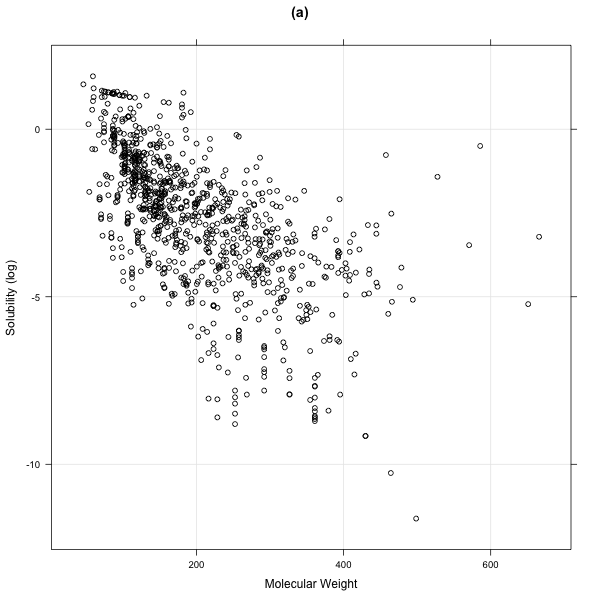

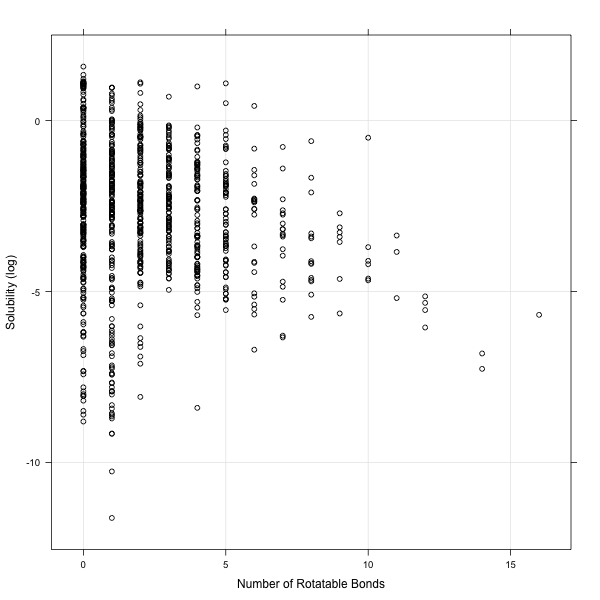

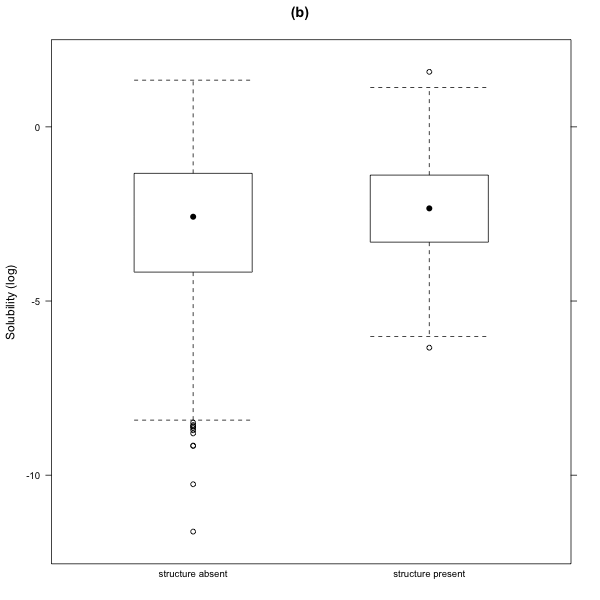

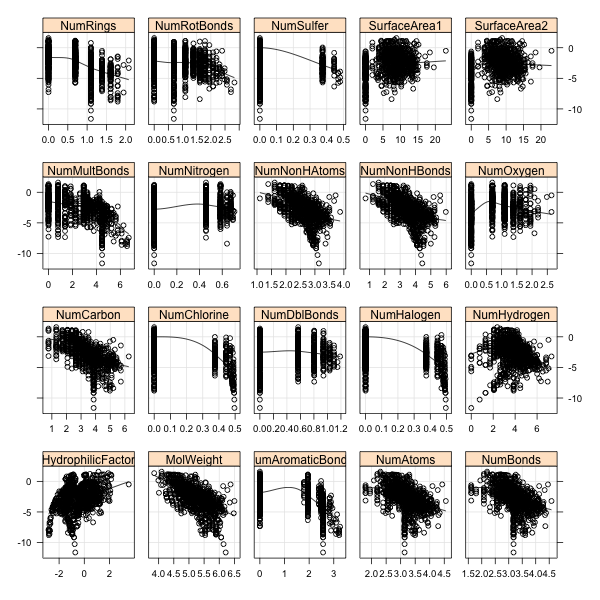

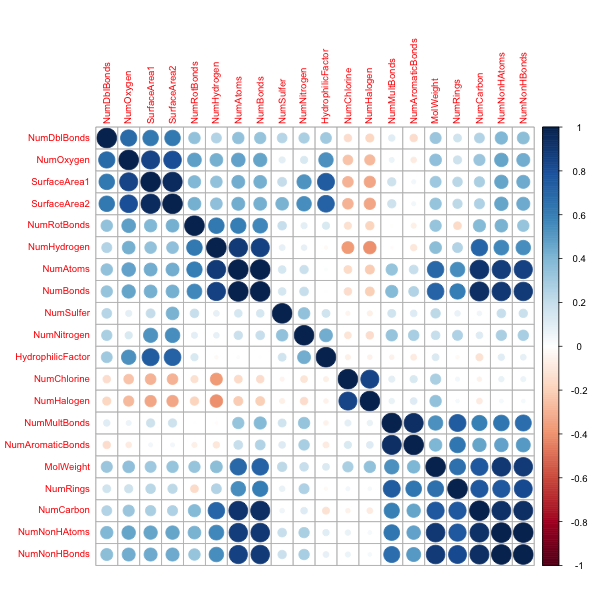

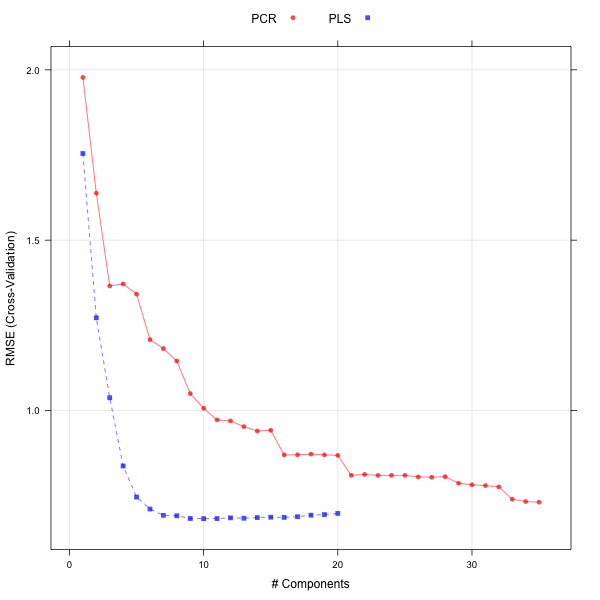

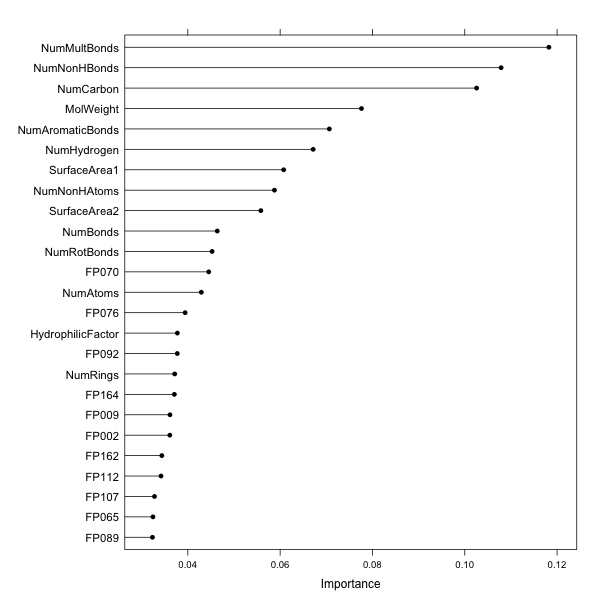

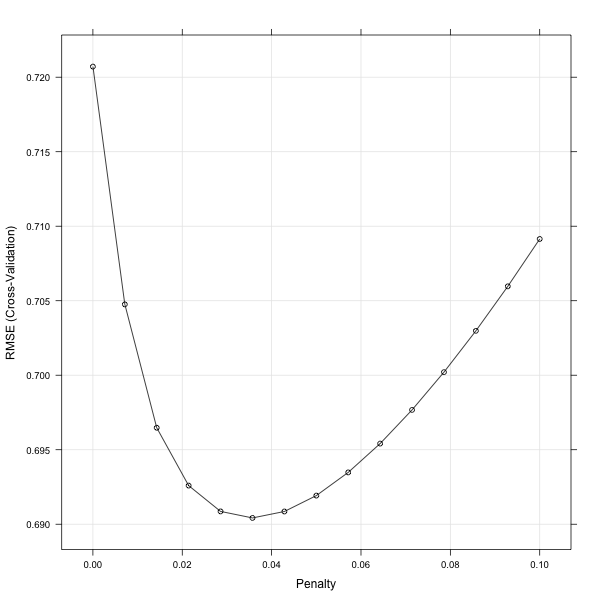

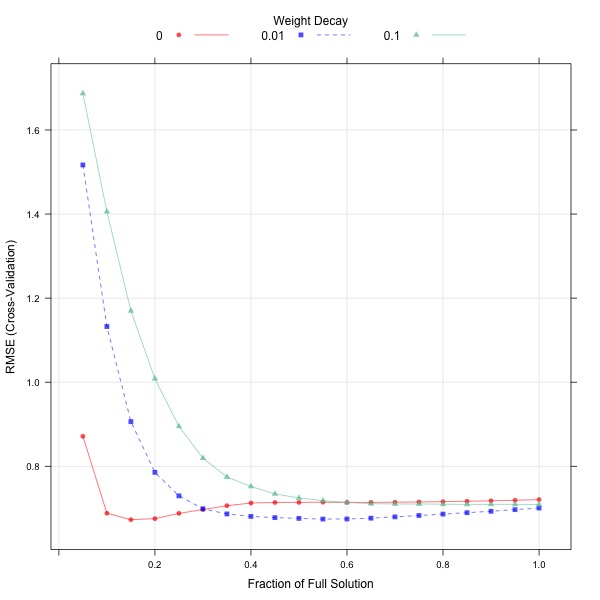

In [56]:
%%R -w 600 -h 600

runChapterScript(6)

##     user  system elapsed 
##  540.993  74.917 615.942 


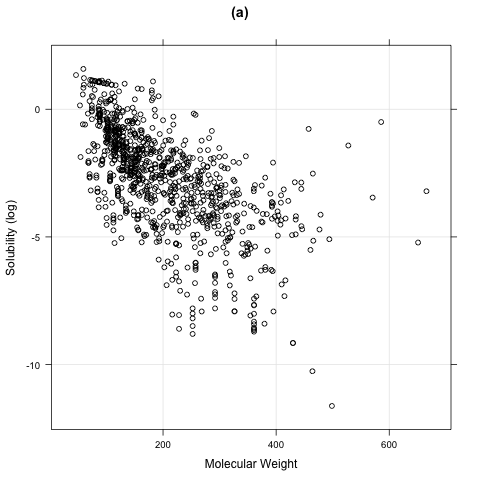

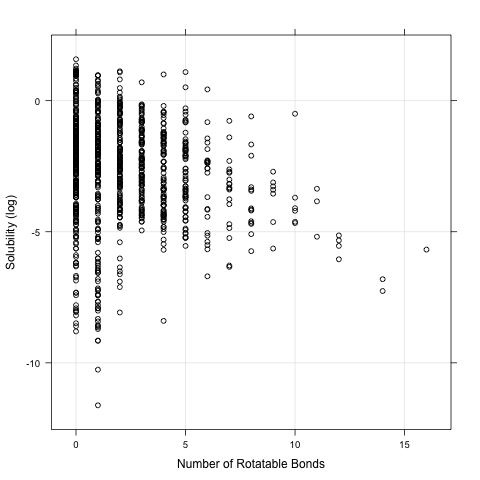

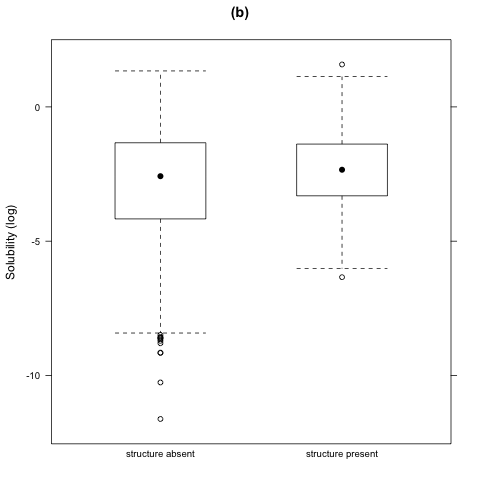

In [65]:
%%R

### Section 6.1 Case Study: Quantitative Structure- Activity
### Relationship Modeling

library(AppliedPredictiveModeling)
data(solubility)

library(lattice)

### Some initial plots of the data
print(
xyplot(solTrainY ~ solTrainX$MolWeight, type = c("p", "g"),
       ylab = "Solubility (log)",
       main = "(a)",
       xlab = "Molecular Weight")
)
print(
xyplot(solTrainY ~ solTrainX$NumRotBonds, type = c("p", "g"),
       ylab = "Solubility (log)",
       xlab = "Number of Rotatable Bonds")
)
print(
bwplot(solTrainY ~ ifelse(solTrainX[,100] == 1,
                          "structure present",
                          "structure absent"),
       ylab = "Solubility (log)",
       main = "(b)",
       horizontal = FALSE)
)

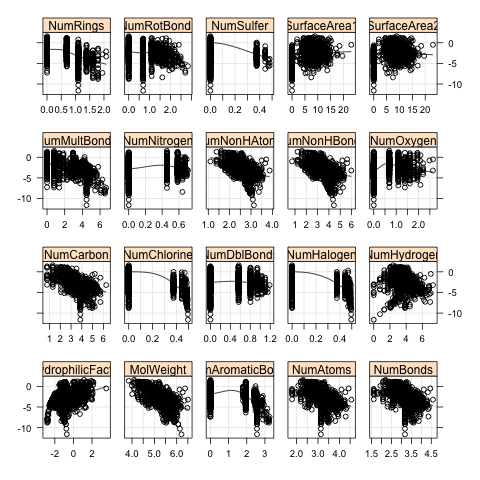

In [127]:
%%R

### Find the columns that are not fingerprints (i.e. the continuous
### predictors). grep will return a list of integers corresponding to
### column names that contain the pattern "FP".

notFingerprints <- grep("FP", names(solTrainXtrans))

library(caret)
print(
featurePlot(solTrainXtrans[, -notFingerprints],
            solTrainY,
            between = list(x = 1, y = 1),
            type = c("g", "p", "smooth"),
            labels = rep("", 2))
)

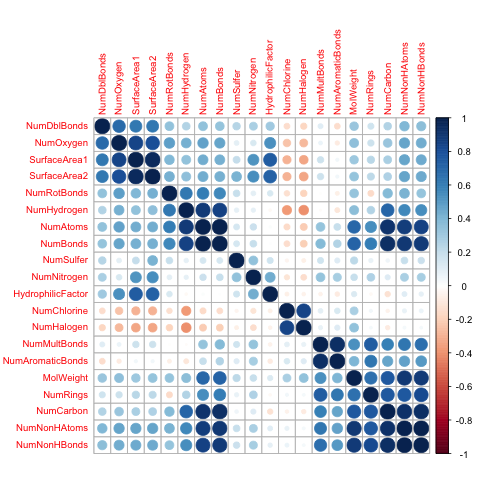

In [128]:
%%R

library(corrplot)

### We used the full namespace to call this function because the pls
### package (also used in this chapter) has a function with the same
### name.

corrplot::corrplot(cor(solTrainXtrans[, -notFingerprints]),
                   order = "hclust",
                   tl.cex = .8)


In [67]:
%%R

### Section 6.2 Linear Regression

### Create a control function that will be used across models. We
### create the fold assignments explicitly instead of relying on the
### random number seed being set to identical values.

set.seed(100)
indx <- createFolds(solTrainY, returnTrain = TRUE)
ctrl <- trainControl(method = "cv", index = indx)

### Linear regression model with all of the predictors. This will
### produce some warnings that a 'rank-deficient fit may be
### misleading'. This is related to the predictors being so highly
### correlated that some of the math has broken down.


set.seed(100)
lmTune0 <- train(x = solTrainXtrans, y = solTrainY,
                 method = "lm",
                 trControl = ctrl)
print(
lmTune0
)
### And another using a set of predictors reduced by unsupervised
### filtering. We apply a filter to reduce extreme between-predictor
### correlations. Note the lack of warnings.

tooHigh <- findCorrelation(cor(solTrainXtrans), .9)
trainXfiltered <- solTrainXtrans[, -tooHigh]
testXfiltered  <-  solTestXtrans[, -tooHigh]

set.seed(100)
lmTune <- train(x = trainXfiltered, y = solTrainY,
                method = "lm",
                trControl = ctrl)
print(
lmTune
)
### Save the test set results in a data frame
testResults <- data.frame(obs = solTestY,
                          Linear_Regression = predict(lmTune, testXfiltered))


Linear Regression 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results

  RMSE       Rsquared   RMSE SD     Rsquared SD
  0.7210355  0.8768359  0.06998223  0.02467069 

 
Linear Regression 

951 samples
190 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results

  RMSE       Rsquared   RMSE SD     Rsquared SD
  0.7113935  0.8793396  0.06320545  0.02434305 

 


In [69]:
%%R

### Section 6.3 Partial Least Squares

## Run PLS and PCR on solubility data and compare results
set.seed(100)
plsTune <- train(x = solTrainXtrans, y = solTrainY,
                 method = "pls",
                 tuneGrid = expand.grid(ncomp = 1:20),
                 trControl = ctrl)
print(
plsTune
)

testResults$PLS <- predict(plsTune, solTestXtrans)

set.seed(100)
pcrTune <- train(x = solTrainXtrans, y = solTrainY,
                 method = "pcr",
                 tuneGrid = expand.grid(ncomp = 1:35),
                 trControl = ctrl)
print(
pcrTune
)

Partial Least Squares 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  ncomp  RMSE       Rsquared   RMSE SD     Rsquared SD
   1     1.7543811  0.2630495  0.08396462  0.06500848 
   2     1.2720647  0.6128490  0.07938883  0.05345622 
   3     1.0373646  0.7432147  0.07155432  0.02761174 
   4     0.8370618  0.8317217  0.05615036  0.02574808 
   5     0.7458318  0.8660461  0.03778846  0.01932122 
   6     0.7106591  0.8779019  0.03432693  0.02281696 
   7     0.6921293  0.8841448  0.03794937  0.02403533 
   8     0.6908481  0.8851647  0.03282238  0.01967729 
   9     0.6828771  0.8877056  0.02910576  0.01851863 
  10     0.6824521  0.8879195  0.03050242  0.01870212 
  11     0.6826719  0.8878955  0.02914169  0.01953986 
  12     0.6847473  0.8872488  0.03726823  0.01936983 
  13     0.6836698  0.8875568  0.03972887  0.01935437 
  14     0.68

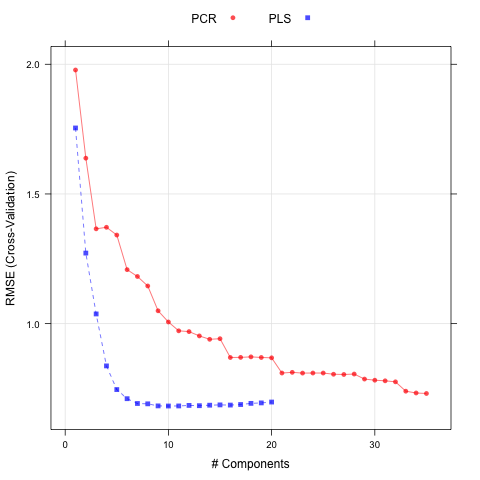

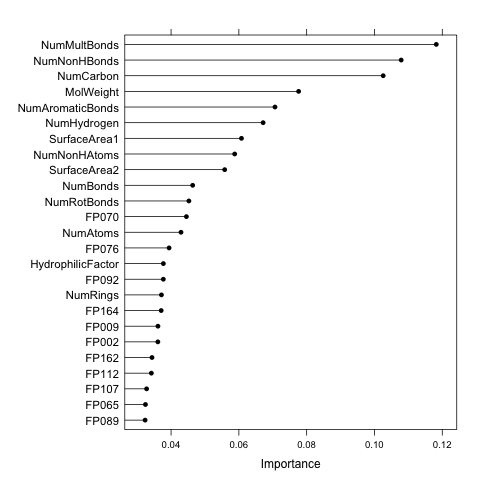

In [70]:
%%R

plsResamples <- plsTune$results
plsResamples$Model <- "PLS"
pcrResamples <- pcrTune$results
pcrResamples$Model <- "PCR"
plsPlotData <- rbind(plsResamples, pcrResamples)

print(
xyplot(RMSE ~ ncomp,
       data = plsPlotData,
       #aspect = 1,
       xlab = "# Components",
       ylab = "RMSE (Cross-Validation)",
       auto.key = list(columns = 2),
       groups = Model,
       type = c("o", "g"))
)

plsImp <- varImp(plsTune, scale = FALSE)
plot(plsImp, top = 25, scales = list(y = list(cex = .95)))

Loading required package: elasticnet
Loading required package: lars
Loaded lars 1.2

Ridge Regression 

951 samples
228 predictors

Pre-processing: centered, scaled 
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  lambda       RMSE       Rsquared   RMSE SD     Rsquared SD
  0.000000000  0.7207117  0.8769717  0.06994063  0.02450628 
  0.007142857  0.7047552  0.8818659  0.04495581  0.01988253 
  0.014285714  0.6964731  0.8847911  0.04051497  0.01867276 
  0.021428571  0.6925923  0.8862699  0.03781419  0.01797165 
  0.028571429  0.6908607  0.8870609  0.03593594  0.01748178 
  0.035714286  0.6904220  0.8874561  0.03457159  0.01710886 
  0.042857143  0.6908548  0.8875998  0.03357310  0.01681167 
  0.050000000  0.6919207  0.8875741  0.03285297  0.01656815 
  0.057142857  0.6934783  0.8874278  0.03234969  0.01636278 
  0.064285714  0.6954114  0.8872009  0.03202921  0.01619286 
  0.071428571  0

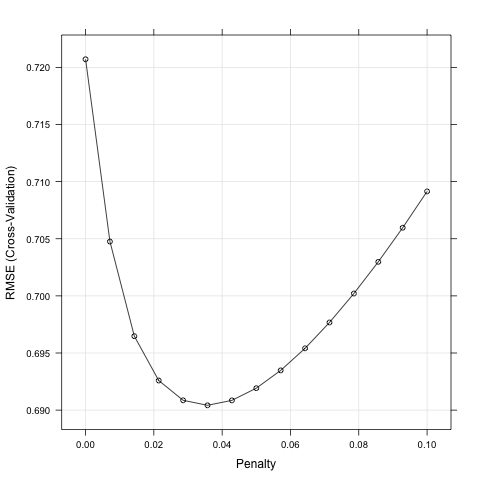

In [71]:
%%R

### Section 6.4 Penalized Models

## The text used the elasticnet to obtain a ridge regression model.
## There is now a simple ridge regression method.

ridgeGrid <- expand.grid(lambda = seq(0, .1, length = 15))

set.seed(100)
ridgeTune <- train(x = solTrainXtrans, y = solTrainY,
                   method = "ridge",
                   tuneGrid = ridgeGrid,
                   trControl = ctrl,
                   preProc = c("center", "scale"))
print(
ridgeTune
)

print(update(plot(ridgeTune), xlab = "Penalty"))

Elasticnet 

951 samples
228 predictors

Pre-processing: centered, scaled 
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  lambda  fraction  RMSE       Rsquared   RMSE SD     Rsquared SD
  0.00    0.05      0.8713747  0.8337289  0.03816148  0.02737681 
  0.00    0.10      0.6882637  0.8858786  0.04298815  0.02064030 
  0.00    0.15      0.6729264  0.8907993  0.03942228  0.01837582 
  0.00    0.20      0.6754697  0.8903865  0.03807506  0.01760700 
  0.00    0.25      0.6879252  0.8865202  0.04383623  0.01946378 
  0.00    0.30      0.6971062  0.8836414  0.04812788  0.02058289 
  0.00    0.35      0.7062274  0.8808469  0.05191262  0.02155822 
  0.00    0.40      0.7125900  0.8788942  0.05345207  0.02192952 
  0.00    0.45      0.7138742  0.8785588  0.05342746  0.02178996 
  0.00    0.50      0.7141235  0.8785622  0.05461747  0.02183522 
  0.00    0.55      0.7144669  0.8784961  0.05583323

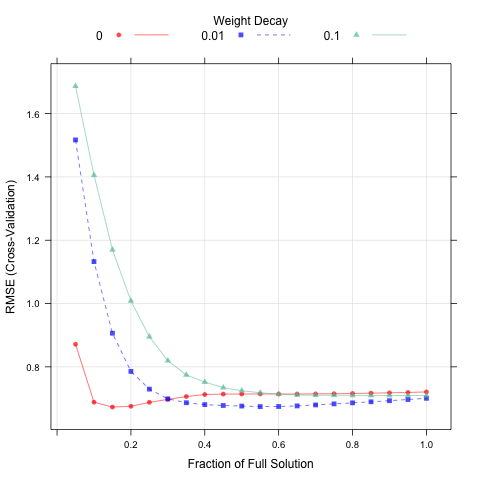

In [80]:
%%R

enetGrid <- expand.grid(lambda = c(0, 0.01, .1),
                        fraction = seq(.05, 1, length = 20))
set.seed(100)
enetTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "enet",
                  tuneGrid = enetGrid,
                  trControl = ctrl,
                  preProc = c("center", "scale"))
print(
enetTune
)

print(
plot(enetTune)
)
testResults$Enet <- predict(enetTune, solTestXtrans)

In [75]:
%%R

showChapterScript(7)

NULL


In [76]:
%%R

showChapterOutput(7)

NULL


In [59]:
%%R -w 600 -h 600

## runChapterScript(7)

##        user     system    elapsed 
##  112106.723    188.979  12272.168 


NULL


In [77]:
%%R

showChapterScript(8)

NULL


In [78]:
%%R

showChapterOutput(8)

NULL


In [62]:
%%R -w 600 -h 600

##  runChapterScript(8)

##       user    system   elapsed 
##  21280.849   500.609  6798.887 


NULL


In [79]:
%%R

showChapterScript(10)

NULL


In [64]:
%%R

showChapterOutput(10)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com)


In [65]:
%%R

# Try this if you are very patient --
# in the APM version of the output file:

##############   THE RUN TIME FOR THIS SCRIPT IS LISTED AS 5.6 HOURS.

# Chs 10 and 17 evaluate many different models in case studies.
# To run the Ch.10 script:

VERY_PATIENT = FALSE

if (VERY_PATIENT) {
   current_working_directory = getwd()  # remember current directory

   chapter_code_directory = scriptLocation()

   setwd( chapter_code_directory )
   print(dir())

   print(source("10_Case_Study_Concrete.R", echo=TRUE))

   setwd(current_working_directory)  # return to working directory
}

##       user    system   elapsed 
##  20277.196   121.470  4043.395 


In [72]:
%%R

showChapterScript(11)

NULL


In [73]:
%%R

showChapterOutput(11)

NULL


In [129]:
%%R -w 600 -h 600

runChapterScript(11)

##     user  system elapsed 
##   11.120   0.526  11.698 

NULL


randomForest 4.6-10
Type rfNews() to see new features/changes/bug fixes.


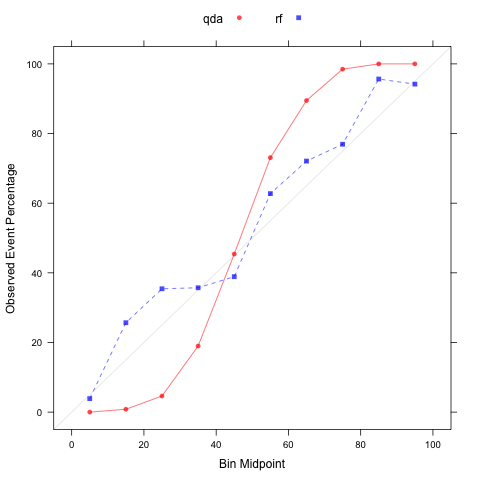

In [81]:
%%R

### Section 11.1 Class Predictions

library(AppliedPredictiveModeling)

### Simulate some two class data with two predictors
set.seed(975)
training <- quadBoundaryFunc(500)
testing <- quadBoundaryFunc(1000)
testing$class2 <- ifelse(testing$class == "Class1", 1, 0)
testing$ID <- 1:nrow(testing)

### Fit models
library(MASS)
qdaFit <- qda(class ~ X1 + X2, data = training)

library(randomForest)
rfFit <- randomForest(class ~ X1 + X2, data = training, ntree = 2000)

### Predict the test set
testing$qda <- predict(qdaFit, testing)$posterior[,1]
testing$rf <- predict(rfFit, testing, type = "prob")[,1]


### Generate the calibration analysis
library(caret)
calData1 <- calibration(class ~ qda + rf, data = testing, cuts = 10)

### Plot the curve
print(
xyplot(calData1, auto.key = list(columns = 2))
)

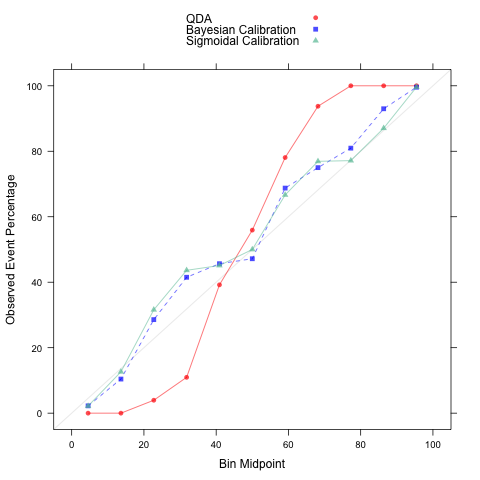

In [82]:
%%R

### To calibrate the data, treat the probabilities as inputs into the
### model

trainProbs <- training
trainProbs$qda <- predict(qdaFit)$posterior[,1]

### These models take the probabilities as inputs and, based on the
### true class, re-calibrate them.
library(klaR)
nbCal <- NaiveBayes(class ~ qda, data = trainProbs, usekernel = TRUE)

### We use relevel() here because glm() models the probability of the
### second factor level.
lrCal <- glm(relevel(class, "Class2") ~ qda, data = trainProbs, family = binomial)

### Now re-predict the test set using the modified class probability
### estimates
testing$qda2 <- predict(nbCal, testing[, "qda", drop = FALSE])$posterior[,1]
testing$qda3 <- predict(lrCal, testing[, "qda", drop = FALSE], type = "response")


### Manipulate the data a bit for pretty plotting
simulatedProbs <- testing[, c("class", "rf", "qda3")]
names(simulatedProbs) <- c("TrueClass", "RandomForestProb", "QDACalibrated")
simulatedProbs$RandomForestClass <-  predict(rfFit, testing)

calData2 <- calibration(class ~ qda + qda2 + qda3, data = testing)
calData2$data$calibModelVar <- as.character(calData2$data$calibModelVar)
calData2$data$calibModelVar <- ifelse(calData2$data$calibModelVar == "qda",
                                      "QDA",
                                      calData2$data$calibModelVar)
calData2$data$calibModelVar <- ifelse(calData2$data$calibModelVar == "qda2",
                                      "Bayesian Calibration",
                                      calData2$data$calibModelVar)

calData2$data$calibModelVar <- ifelse(calData2$data$calibModelVar == "qda3",
                                      "Sigmoidal Calibration",
                                      calData2$data$calibModelVar)

calData2$data$calibModelVar <- factor(calData2$data$calibModelVar,
                                      levels = c("QDA",
                                                 "Bayesian Calibration",
                                                 "Sigmoidal Calibration"))
print(
xyplot(calData2, auto.key = list(columns = 1))
)

Generalized Linear Model 

800 samples
 41 predictor
  2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 

Resampling results

  Accuracy  Kappa      Accuracy SD  Kappa SD 
  0.749     0.3647664  0.05162166   0.1218109

 
Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   24   10
      Good  36  130
                                          
               Accuracy : 0.77            
                 95% CI : (0.7054, 0.8264)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.0168694       
                                          
                  Kappa : 0.375           
 Mcnemar's Test P-Value : 0.0002278       
                                          
            Sensitivity : 0.4000          
            Specificity : 0.9286          
         Pos Pred Value : 0.7059          
         Neg Pred Value : 0.7831     

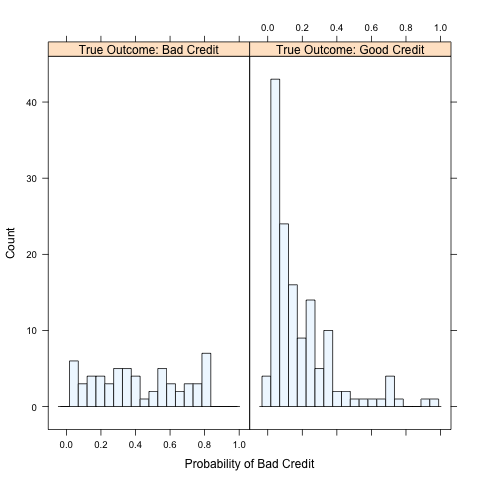

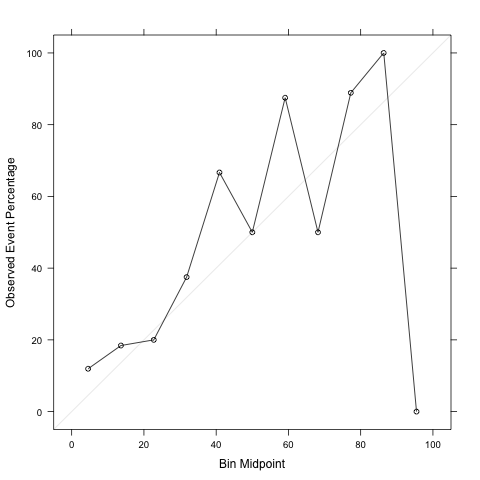

In [119]:
%%R

## These commands are needed to reload GermanCredit, which is changed by this and Ch.4 code:

detach(package:caret)
library(caret)
data(GermanCredit)

## First, remove near-zero variance predictors then get rid of a few predictors
## that duplicate values. For example, there are two possible values for the
## housing variable: "Rent", "Own" and "ForFree". So that we don't have linear
## dependencies, we get rid of one of the levels (e.g. "ForFree")

GermanCredit <- GermanCredit[, -nearZeroVar(GermanCredit)]
GermanCredit$CheckingAccountStatus.lt.0 <- NULL
GermanCredit$SavingsAccountBonds.lt.100 <- NULL
GermanCredit$EmploymentDuration.lt.1 <- NULL
GermanCredit$EmploymentDuration.Unemployed <- NULL
GermanCredit$Personal.Male.Married.Widowed <- NULL
GermanCredit$Property.Unknown <- NULL
GermanCredit$Housing.ForFree <- NULL

## Split the data into training (80%) and test sets (20%)
set.seed(100)
inTrain <- createDataPartition(GermanCredit$Class, p = .8)[[1]]
GermanCreditTrain <- GermanCredit[ inTrain, ]
GermanCreditTest  <- GermanCredit[-inTrain, ]

set.seed(1056)
logisticReg <- train(Class ~ .,
                     data = GermanCreditTrain,
                     method = "glm",
                     trControl = trainControl(method = "repeatedcv",
                                              repeats = 5))
print(
logisticReg
)

### Predict the test set
creditResults <- data.frame(obs = GermanCreditTest$Class)
creditResults$prob <- predict(logisticReg, GermanCreditTest, type = "prob")[, "Bad"]
creditResults$pred <- predict(logisticReg, GermanCreditTest)
creditResults$Label <- ifelse(creditResults$obs == "Bad",
                              "True Outcome: Bad Credit",
                              "True Outcome: Good Credit")

### Plot the probability of bad credit
print(
histogram(~prob|Label,
          data = creditResults,
          layout = c(2, 1),
          nint = 20,
          xlab = "Probability of Bad Credit",
          type = "count")
)

### Calculate and plot the calibration curve
creditCalib <- calibration(obs ~ prob, data = creditResults)

print(
xyplot(creditCalib)
)

### Create the confusion matrix from the test set.
print(
confusionMatrix(data = creditResults$pred,
                reference = creditResults$obs)
)

Area under the curve: 0.775
95% CI: 0.7032-0.8468 (DeLong)


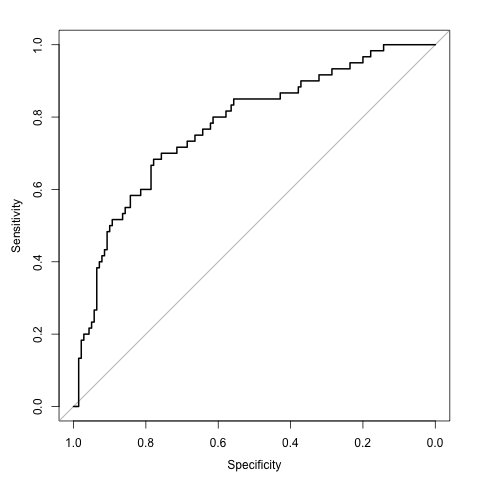

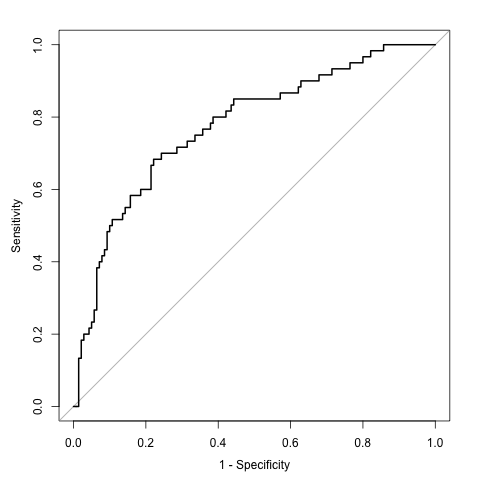

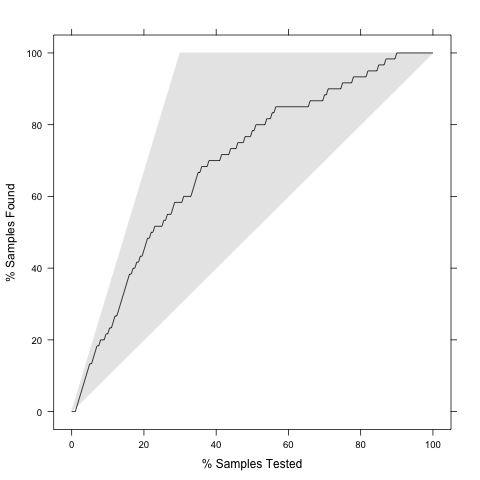

In [120]:
%%R

### ROC curves:

### Like glm(), roc() treats the last level of the factor as the event
### of interest so we use relevel() to change the observed class data

library(pROC)
creditROC <- roc(relevel(creditResults$obs, "Good"), creditResults$prob)

coords(creditROC, "all")[,1:3]

print(
auc(creditROC)
)

print(   
ci.auc(creditROC)
)

### Note the x-axis is reversed
plot(creditROC)

### Old-school:
plot(creditROC, legacy.axes = TRUE)

### Lift charts

creditLift <- lift(obs ~ prob, data = creditResults)

print(
xyplot(creditLift)
)

In [121]:
%%R
summary(GermanCredit)

    Duration        Amount      InstallmentRatePercentage ResidenceDuration
 Min.   : 4.0   Min.   :  250   Min.   :1.000             Min.   :1.000    
 1st Qu.:12.0   1st Qu.: 1366   1st Qu.:2.000             1st Qu.:2.000    
 Median :18.0   Median : 2320   Median :3.000             Median :3.000    
 Mean   :20.9   Mean   : 3271   Mean   :2.973             Mean   :2.845    
 3rd Qu.:24.0   3rd Qu.: 3972   3rd Qu.:4.000             3rd Qu.:4.000    
 Max.   :72.0   Max.   :18424   Max.   :4.000             Max.   :4.000    
      Age        NumberExistingCredits NumberPeopleMaintenance   Telephone    
 Min.   :19.00   Min.   :1.000         Min.   :1.000           Min.   :0.000  
 1st Qu.:27.00   1st Qu.:1.000         1st Qu.:1.000           1st Qu.:0.000  
 Median :33.00   Median :1.000         Median :1.000           Median :1.000  
 Mean   :35.55   Mean   :1.407         Mean   :1.155           Mean   :0.596  
 3rd Qu.:42.00   3rd Qu.:2.000         3rd Qu.:1.000           3rd Qu.:1.

In [85]:
%%R

showChapterScript(12)

NULL


In [70]:
%%R

showChapterOutput(12)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com) 

In [71]:
%%R -w 600 -h 600

## runChapterScript(12)

##        user     system    elapsed 
##  376332.996   8337.928  35694.682 


NULL


In [86]:
%%R

showChapterScript(13)

NULL


In [73]:
%%R

showChapterOutput(13)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com) 

In [74]:
%%R -w 600 -h 600

##  runChapterScript(13)

##       user    system   elapsed 
##  313451.24   2270.67  52861.72 


NULL


In [87]:
%%R

showChapterScript(14)

NULL


In [76]:
%%R

showChapterOutput(14)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com) 

In [77]:
%%R -w 600 -h 600

## runChapterScript(14)

##        user     system    elapsed 
##  208496.296    776.829 209791.456 


NULL


In [88]:
%%R

showChapterScript(16)

NULL


In [79]:
%%R

showChapterOutput(16)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com) 

In [80]:
%%R -w 600 -h 600

## runChapterScript(16)

##        user     system    elapsed 
##  243437.520    682.066 244138.032 


NULL


In [89]:
%%R

showChapterScript(17)

NULL


In [82]:
%%R

showChapterOutput(17)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com) 

In [83]:
%%R -w 600 -h 600

## runChapterScript(17)

##       user    system   elapsed 
##  492217.97  31824.96  39801.06 

NULL


In [90]:
%%R

showChapterScript(18)

NULL


In [85]:
%%R

showChapterOutput(18)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com) 

In [101]:
%%R -w 600 -h 600

runChapterScript(18)

##     user  system elapsed 
##   78.161   0.635  79.081 


NULL


In [92]:
%%R

### Section 18.1 Numeric Outcomes

## Load the solubility data

library(AppliedPredictiveModeling)
data(solubility)

trainData <- solTrainXtrans
trainData$y <- solTrainY


## keep the continuous predictors and append the outcome to the data frame
SolContPred <- solTrainXtrans[, !grepl("FP", names(solTrainXtrans))]
numSolPred <- ncol(SolContPred)
SolContPred$Sol <- solTrainY

## Get the LOESS smoother and the summary measure
library(caret)
smoother <- filterVarImp(x = SolContPred[, -ncol(SolContPred)],
                         y = solTrainY,
                         nonpara = TRUE)
smoother$Predictor <- rownames(smoother)
names(smoother)[1] <- "Smoother"

## Calculate the correlation matrices and keep the columns with the correlations
## between the predictors and the outcome

correlations <- cor(SolContPred)[-(numSolPred+1),(numSolPred+1)]
rankCorrelations <- cor(SolContPred, method = "spearman")[-(numSolPred+1),(numSolPred+1)]
corrs <- data.frame(Predictor = names(SolContPred)[1:numSolPred],
                    Correlation = correlations,
                    RankCorrelation  = rankCorrelations)

## The maximal information coefficient (MIC) values can be obtained from the
### minerva package:

library(minerva)
MIC <- mine(x = SolContPred[, 1:numSolPred], y = solTrainY)$MIC
MIC <- data.frame(Predictor = rownames(MIC),
                  MIC = MIC[,1])


## The Relief values for regression can be computed using the CORElearn
## package:

library(CORElearn)
ReliefF <- attrEval(Sol ~ .,  data = SolContPred,
                    estimator = "RReliefFequalK")
ReliefF <- data.frame(Predictor = names(ReliefF),
                  Relief = ReliefF)

## Combine them all together for a plot
contDescrScores <- merge(smoother, corrs)
contDescrScores <- merge(contDescrScores, MIC)
contDescrScores <- merge(contDescrScores, ReliefF)

rownames(contDescrScores) <- contDescrScores$Predictor

print(
contDescrScores
)

contDescrSplomData <- contDescrScores
contDescrSplomData$Correlation <- abs(contDescrSplomData$Correlation)
contDescrSplomData$RankCorrelation <- abs(contDescrSplomData$RankCorrelation)
contDescrSplomData$Group <- "Other"
contDescrSplomData$Group[grepl("Surface", contDescrSplomData$Predictor)] <- "SA"

                          Predictor    Smoother Correlation RankCorrelation
HydrophilicFactor HydrophilicFactor 0.184455208  0.38598321      0.36469127
MolWeight                 MolWeight 0.444393085 -0.65852844     -0.68529880
NumAromaticBonds   NumAromaticBonds 0.168645461 -0.41066466     -0.45787109
NumAtoms                   NumAtoms 0.189931478 -0.43581129     -0.51983173
NumBonds                   NumBonds 0.210717251 -0.45903949     -0.54839850
NumCarbon                 NumCarbon 0.368196173 -0.60679170     -0.67359114
NumChlorine             NumChlorine 0.158529031 -0.39815704     -0.35707519
NumDblBonds             NumDblBonds 0.002409996  0.04909171     -0.02042731
NumHalogen               NumHalogen 0.157187646 -0.39646897     -0.38111965
NumHydrogen             NumHydrogen 0.022654223 -0.15051320     -0.25592586
NumMultBonds           NumMultBonds 0.230799468 -0.48041593     -0.47971353
NumNitrogen             NumNitrogen 0.026032871  0.16134705      0.10078218
NumNonHAtoms

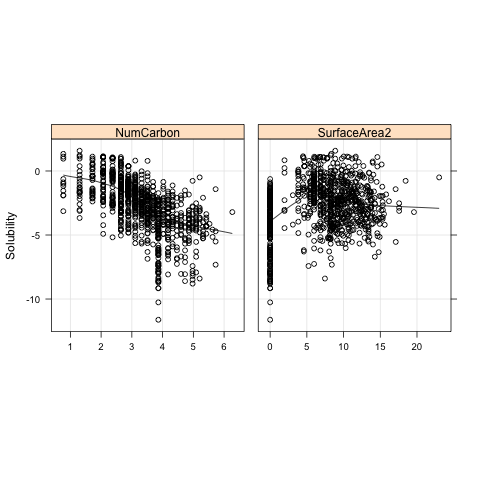

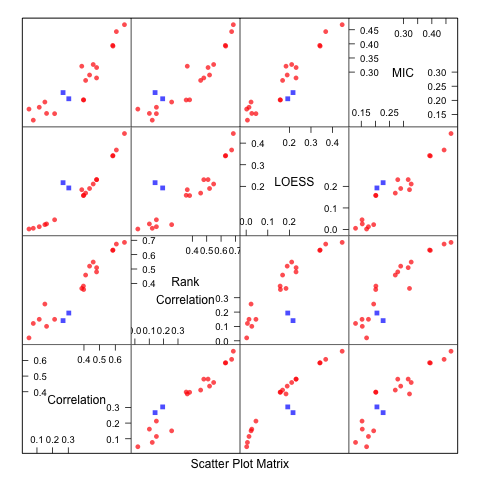

In [93]:
%%R

print(
featurePlot(solTrainXtrans[, c("NumCarbon", "SurfaceArea2")],
            solTrainY,
            between = list(x = 1),
            type = c("g", "p", "smooth"),
            df = 3,
            aspect = 1,
            labels = c("", "Solubility"))
)

print(
splom(~contDescrSplomData[,c(3, 4, 2, 5)],
      groups = contDescrSplomData$Group,
      varnames = c("Correlation", "Rank\nCorrelation", "LOESS", "MIC"))
)

In [130]:
%%R

## Now look at the categorical (i.e. binary) predictors
SolCatPred <- solTrainXtrans[, grepl("FP", names(solTrainXtrans))]
SolCatPred$Sol <- solTrainY
numSolCatPred <- ncol(SolCatPred) - 1

tests <- apply(SolCatPred[, 1:numSolCatPred], 2,
                  function(x, y)
                    {
                    tStats <- t.test(y ~ x)[c("statistic", "p.value", "estimate")]
                    unlist(tStats)
                    },
               y = solTrainY)

## The results are a matrix with predictors in columns. We reverse this
tests <- as.data.frame(t(tests))
names(tests) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
tests$difference <- tests$mean1 - tests$mean0

print(
tests
)

      t.Statistic t.test_p.value     mean0     mean1   difference
FP001 -4.02204024   6.287404e-05 -2.978465 -2.451471  0.526993515
FP002 10.28672686   1.351580e-23 -2.021347 -3.313860 -1.292512617
FP003 -2.03644225   4.198619e-02 -2.832164 -2.571855  0.260308757
FP004 -4.94895770   9.551772e-07 -3.128380 -2.427428  0.700951689
FP005 10.28247538   1.576549e-23 -1.969000 -3.262722 -1.293722323
FP006 -7.87583806   9.287835e-15 -3.109421 -2.133832  0.975589032
FP007 -0.88733923   3.751398e-01 -2.759967 -2.646185  0.113781971
FP008  3.32843788   9.119521e-04 -2.582652 -2.999613 -0.416960797
FP009 11.49360533   7.467714e-27 -2.249591 -3.926278 -1.676686955
FP010 -4.11392307   4.973603e-05 -2.824302 -2.232824  0.591478647
FP011 -7.01680213   1.067782e-11 -2.934645 -1.927353  1.007292306
FP012 -1.89255407   5.953582e-02 -2.773755 -2.461369  0.312385742
FP013 11.73267872   1.088092e-24 -2.365485 -4.490696 -2.125210704
FP014 11.47456176   1.157457e-23 -2.375401 -4.508431 -2.133030370
FP015 -7.7

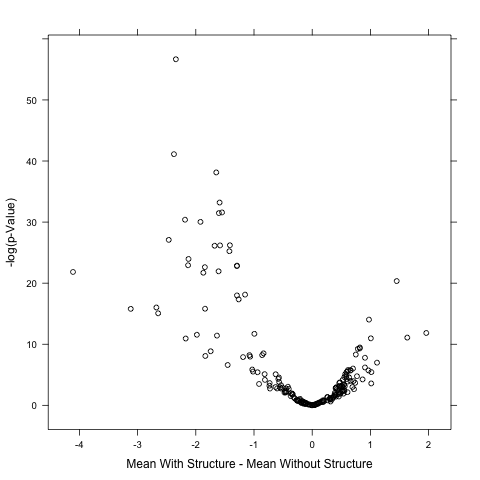

In [131]:
%%R

## Create a volcano plot
print(
xyplot(-log10(t.test_p.value) ~ difference,
       data = tests,
       xlab = "Mean With Structure - Mean Without Structure",
       ylab = "-log(p-Value)",
       type = "p")
)

In [97]:
%%R

### Section 18.2 Categorical Outcomes

## Load the segmentation data

data(segmentationData)
segTrain <- subset(segmentationData, Case == "Train")
segTrain$Case <- segTrain$Cell <- NULL

segTest <- subset(segmentationData, Case != "Train")
segTest$Case <- segTest$Cell <- NULL

## Compute the areas under the ROC curve
aucVals <- filterVarImp(x = segTrain[, -1], y = segTrain$Class)
aucVals$Predictor <- rownames(aucVals)

## Cacluate the t-tests as before but with x and y switched
segTests <- apply(segTrain[, -1], 2,
                  function(x, y)
                    {
                    tStats <- t.test(x ~ y)[c("statistic", "p.value", "estimate")]
                    unlist(tStats)
                    },
               y = segTrain$Class)
segTests <- as.data.frame(t(segTests))
names(segTests) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
segTests$Predictor <- rownames(segTests)

## Fit a random forest model and get the importance scores
library(randomForest)
set.seed(791)
rfImp <- randomForest(Class ~ ., data = segTrain,
                      ntree = 2000,
                      importance = TRUE)
rfValues <- data.frame(RF = importance(rfImp)[, "MeanDecreaseGini"],
                       Predictor = rownames(importance(rfImp)))

## Now compute the Relief scores
set.seed(791)

ReliefValues <- attrEval(Class ~ ., data = segTrain,
                         estimator="ReliefFequalK", ReliefIterations = 50)
ReliefValues <- data.frame(Relief = ReliefValues,
                           Predictor = names(ReliefValues))

## and the MIC statistics
set.seed(791)
segMIC <- mine(x = segTrain[, -1],
               ## Pass the outcome as 0/1
               y = ifelse(segTrain$Class == "PS", 1, 0))$MIC
segMIC <- data.frame(Predictor = rownames(segMIC),
                  MIC = segMIC[,1])


rankings <- merge(segMIC, ReliefValues)
rankings <- merge(rankings, rfValues)
rankings <- merge(rankings, segTests)
rankings <- merge(rankings, aucVals)
print(
rankings
)

                 Predictor         MIC       Relief        RF  t.Statistic
1                 AngleCh1 0.131057008  0.002287557  4.730963  -0.21869850
2                  AreaCh1 0.108083908  0.016041257  4.315317  -0.93160658
3              AvgIntenCh1 0.292046076  0.071057681 18.865802 -11.75400848
4              AvgIntenCh2 0.329484594  0.150684824 21.857848 -16.09400822
5              AvgIntenCh3 0.135443794  0.018172519  5.135363  -0.14752973
6              AvgIntenCh4 0.166545039 -0.007167866  5.434737  -6.23725001
7   ConvexHullAreaRatioCh1 0.299627157  0.035983697 19.093048  14.22756193
8  ConvexHullPerimRatioCh1 0.254931744  0.041865999 12.624038 -13.86697029
9      DiffIntenDensityCh1 0.239224382  0.038582763  7.335741  -9.81721615
10     DiffIntenDensityCh3 0.133084659  0.010830941  6.647198   1.48785690
11     DiffIntenDensityCh4 0.147643832  0.042352546  5.386981  -5.54840221
12         EntropyIntenCh1 0.261097110  0.129280729 13.867582 -14.04326173
13         EntropyIntenCh

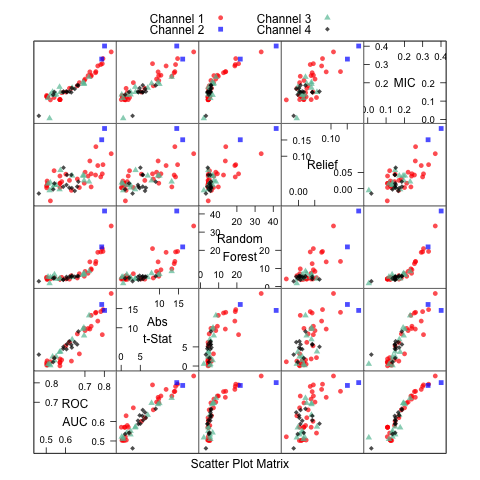

In [96]:
%%R

rankings$channel <- "Channel 1"
rankings$channel[grepl("Ch2$", rankings$Predictor)] <- "Channel 2"
rankings$channel[grepl("Ch3$", rankings$Predictor)] <- "Channel 3"
rankings$channel[grepl("Ch4$", rankings$Predictor)] <- "Channel 4"
rankings$t.Statistic <- abs(rankings$t.Statistic)

print(
splom(~rankings[, c("PS", "t.Statistic", "RF", "Relief", "MIC")],
      groups = rankings$channel,
      varnames = c("ROC\nAUC", "Abs\nt-Stat", "Random\nForest", "Relief", "MIC"),
      auto.key = list(columns = 2))
)

In [100]:
%%R

## Load the grant data. A script to create and save these data is contained
## in the same directory as this file.

source( file.path( scriptLocation(), "CreateGrantData.R" ),  echo=TRUE )

load("grantData.RData")

dataSubset <- training[pre2008, c("Sponsor62B", "ContractValueBandUnk", "RFCD240302")]

## This is a simple function to compute several statistics for binary predictors
tableCalcs <- function(x, y)
  {
  tab <- table(x, y)
  fet <- fisher.test(tab)
  out <- c(OR = fet$estimate,
           P = fet$p.value,
           Gain = attrEval(y ~ x, estimator = "GainRatio"))
  }

## lapply() is used to execute the function on each column
tableResults <- lapply(dataSubset, tableCalcs, y = training[pre2008, "Class"])

## The results come back as a list of vectors, and "rbind" is used to join
## then together as rows of a table
tableResults <- do.call("rbind", tableResults)
print(
    tableResults
)

## The permuted Relief scores can be computed using a function from the
## AppliedPredictiveModeling package.

permuted <- permuteRelief(x = training[pre2008, c("Sponsor62B", "Day", "NumCI")],
                          y = training[pre2008, "Class"],
                          nperm = 500,
                          ### the remaining options are passed to attrEval()
                          estimator="ReliefFequalK",
                          ReliefIterations= 50)

## The original Relief scores:
print(
permuted$observed
)

## The number of standard deviations away from the permuted mean:
print(
permuted$standardized
)

## The distributions of the scores if there were no relationship between the
## predictors and outcomes

print(
histogram(~value|Predictor,
          data = permuted$permutations,
          xlim = extendrange(permuted$permutations$value),
          xlab = "Relief Score")
)


> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Jo .... [TRUNCATED] 

> library(caret)

> library(lubridate)

Attaching package: 'lubridate'

The following object is masked from 'package:plyr':

    here


> ## How many cores on the machine should be used for the data
> ## processing. Making cores > 1 will speed things up (depending on your
> ## machine) .... [TRUNCATED] 
Error in file(file, "rt") : cannot open the connection
In addition: Warning message:
In file(file, "rt") :
  cannot open file 'unimelb_training.csv': No such file or directory
Error in file(file, "rt") : cannot open the connection


In [98]:
%%R

showChapterScript(19)

NULL


In [88]:
%%R

showChapterOutput(19)

R Information
R version 3.0.1 (2013-05-16) -- "Good Sport"
Copyright (C) 2013 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin10.8.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Johnson.
> ### Copyright 2013 Kuhn and Johnson
> ### Web Page: http://www.appliedpredictivemodeling.com
> ### Contact: Max Kuhn (mxkuhn@gmail.com) 

In [ ]:
%%R -w 600 -h 600

## runChapterScript(19)

##       user     system    elapsed 
## 257587.585   7078.267  35323.717 
